# Exploratory Data Analysis in R

> use graphical and numerical techniques to begin uncovering the structure of your data

- author: Victor Omondi
- toc: true
- comments: true
- categories: [eda, r, data-analysis]
- image: images/eda-r-shield.png

# Overview

When a dataset is represented as a table or a database, it's difficult to observe much about it beyond its size and the types of variables it contains. We'll explore how to use graphical and numerical techniques to begin uncovering the structure of data. Which variables suggest interesting relationships? Which observations are unusual? We'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.

# Libraries

In [84]:
library(readr)
library(ggplot2)
library(dplyr)
library(gapminder)
library(openintro)

Warning message:
"package 'openintro' was built under R version 3.6.3"Loading required package: airports
Warning message:
"package 'airports' was built under R version 3.6.3"Loading required package: cherryblossom
Warning message:
"package 'cherryblossom' was built under R version 3.6.3"Loading required package: usdata
Warning message:
"package 'usdata' was built under R version 3.6.3"

# Exploring Categorical Data

We will explore how to create graphical and numerical summaries of two categorical variables.

> ### Comics dataset
This is a collection of characteristics on all of the superheroes created by Marvel and DC comics in the last 80 years.

In [2]:
comics <- read_csv("datasets/comics.csv")
head(comics)

Parsed with column specification:
cols(
  name = col_character(),
  id = col_character(),
  align = col_character(),
  eye = col_character(),
  hair = col_character(),
  gender = col_character(),
  gsm = col_character(),
  alive = col_character(),
  appearances = col_double(),
  first_appear = col_character(),
  publisher = col_character()
)


name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


> ### Working with factors

In [3]:
comics$align = as.factor(comics$align)
levels(comics$align)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

In [4]:
comics$id = as.factor(comics$id)
levels(comics$id)

[1] "No Dual" "Public"  "Secret"  "Unknown"

In [5]:
table(comics$id, comics$align)

         
           Bad Good Neutral Reformed Criminals
  No Dual  474  647     390                  0
  Public  2172 2930     965                  1
  Secret  4493 2475     959                  1
  Unknown    7    0       2                  0

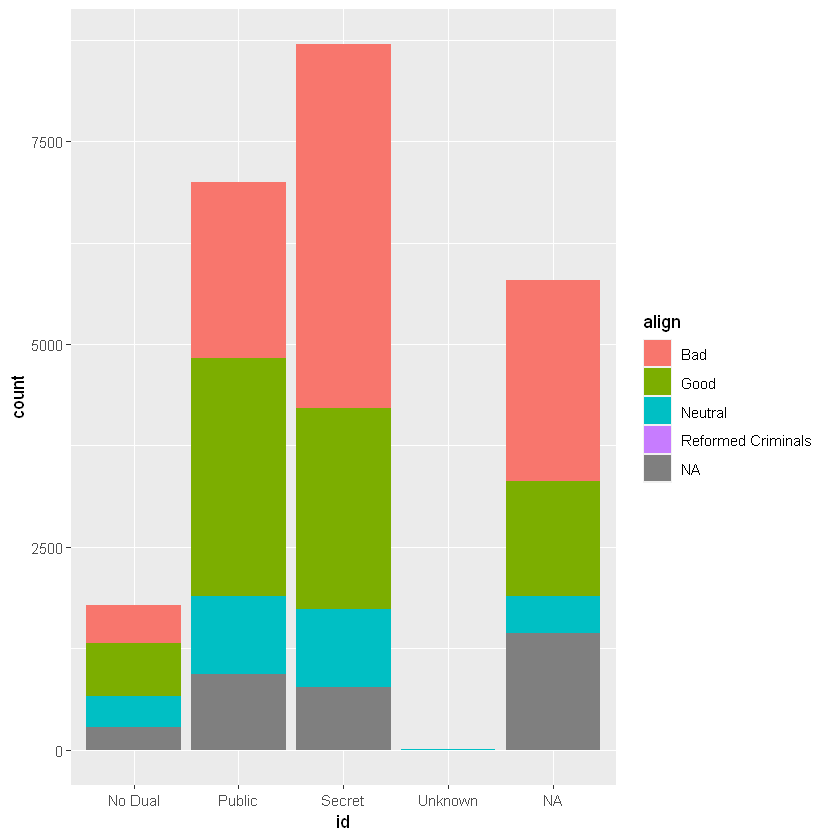

In [6]:
comics %>%
    ggplot(aes(x=id, fill=align)) +
        geom_bar()

In [7]:
str(comics)

tibble [23,272 x 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ name        : chr [1:23272] "Spider-Man (Peter Parker)" "Captain America (Steven Rogers)" "Wolverine (James \\\"Logan\\\" Howlett)" "Iron Man (Anthony \\\"Tony\\\" Stark)" ...
 $ id          : Factor w/ 4 levels "No Dual","Public",..: 3 2 2 2 1 2 2 2 2 2 ...
 $ align       : Factor w/ 4 levels "Bad","Good","Neutral",..: 2 2 3 2 2 2 2 2 3 2 ...
 $ eye         : chr [1:23272] "Hazel Eyes" "Blue Eyes" "Blue Eyes" "Blue Eyes" ...
 $ hair        : chr [1:23272] "Brown Hair" "White Hair" "Black Hair" "Black Hair" ...
 $ gender      : chr [1:23272] "Male" "Male" "Male" "Male" ...
 $ gsm         : chr [1:23272] NA NA NA NA ...
 $ alive       : chr [1:23272] "Living Characters" "Living Characters" "Living Characters" "Living Characters" ...
 $ appearances : num [1:23272] 4043 3360 3061 2961 2258 ...
 $ first_appear: chr [1:23272] "Aug-62" "Mar-41" "Oct-74" "Mar-63" ...
 $ publisher   : chr [1:23272] "marvel" "marvel" "marvel" "marv

In [8]:
comics$name = as.factor(comics$name)
comics$eye = as.factor(comics$eye)
comics$hair = as.factor(comics$hair)
comics$gender = as.factor(comics$gender)
comics$gsm = as.factor(comics$gsm)
comics$alive = as.factor(comics$alive)
comics$first_appear = as.factor(comics$first_appear)
comics$publisher = as.factor(comics$publisher)

str(comics)

tibble [23,272 x 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ name        : Factor w/ 23272 levels "'Spinner (Earth-616)",..: 19830 3335 22769 9647 20956 2220 17576 9347 18794 10957 ...
 $ id          : Factor w/ 4 levels "No Dual","Public",..: 3 2 2 2 1 2 2 2 2 2 ...
 $ align       : Factor w/ 4 levels "Bad","Good","Neutral",..: 2 2 3 2 2 2 2 2 3 2 ...
 $ eye         : Factor w/ 26 levels "Amber Eyes","Auburn Hair",..: 11 5 5 5 5 5 6 6 6 5 ...
 $ hair        : Factor w/ 28 levels "Auburn Hair",..: 7 27 3 3 4 14 7 7 7 4 ...
 $ gender      : Factor w/ 3 levels "Female","Male",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ gsm         : Factor w/ 6 levels "Bisexual Characters",..: NA NA NA NA NA NA NA NA NA NA ...
 $ alive       : Factor w/ 2 levels "Deceased Characters",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ appearances : num [1:23272] 4043 3360 3061 2961 2258 ...
 $ first_appear: Factor w/ 1606 levels "1935, October",..: 874 1278 1513 1296 1424 1432 1432 1364 1570 1432 ...
 $ publisher   : Factor w/ 2 level

In [9]:
# Check the levels of gender
levels(comics$gender)

[1] "Female" "Male"   "Other"

In [10]:
# Create a 2-way contingency table
(tab <- table(comics$gender, comics$align))

        
          Bad Good Neutral Reformed Criminals
  Female 1573 2490     836                  1
  Male   7561 4809    1799                  2
  Other    32   17      17                  0

### Dropping levels

The contingency table from the last exercise revealed that there are some levels that have very low counts. To simplify the analysis, it often helps to drop such levels.

this requires two steps: 
- first filtering out any rows with the levels that have very low counts, 
- then removing these levels from the factor variable with `droplevels()`. 

This is because the `droplevels()` function would keep levels that have just 1 or 2 counts; it only drops levels that don't exist in a dataset.

In [11]:
# Remove align level
comics_filtered <- comics %>%
  filter(align != "Reformed Criminals") %>%
  droplevels()
levels(comics_filtered$align)

[1] "Bad"     "Good"    "Neutral"

### Side-by-side barcharts

While a contingency table represents the counts numerically, it's often more useful to represent them graphically.

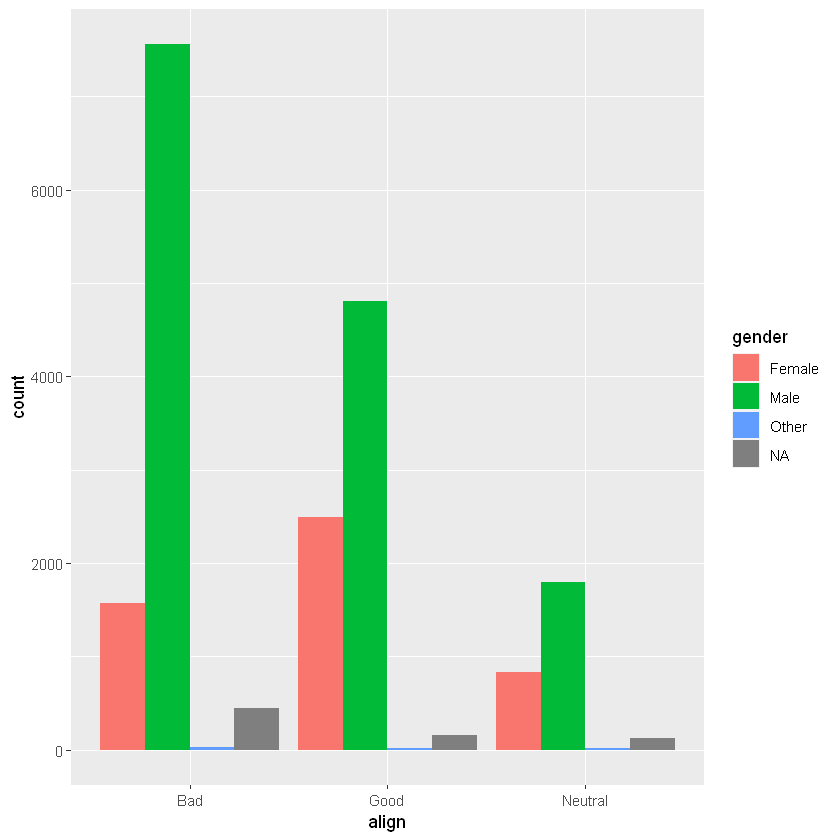

In [12]:
# Create side-by-side barchart of gender by alignment
comics_filtered %>%
    ggplot(aes(x = align, fill = gender)) + 
    geom_bar(position = "dodge")

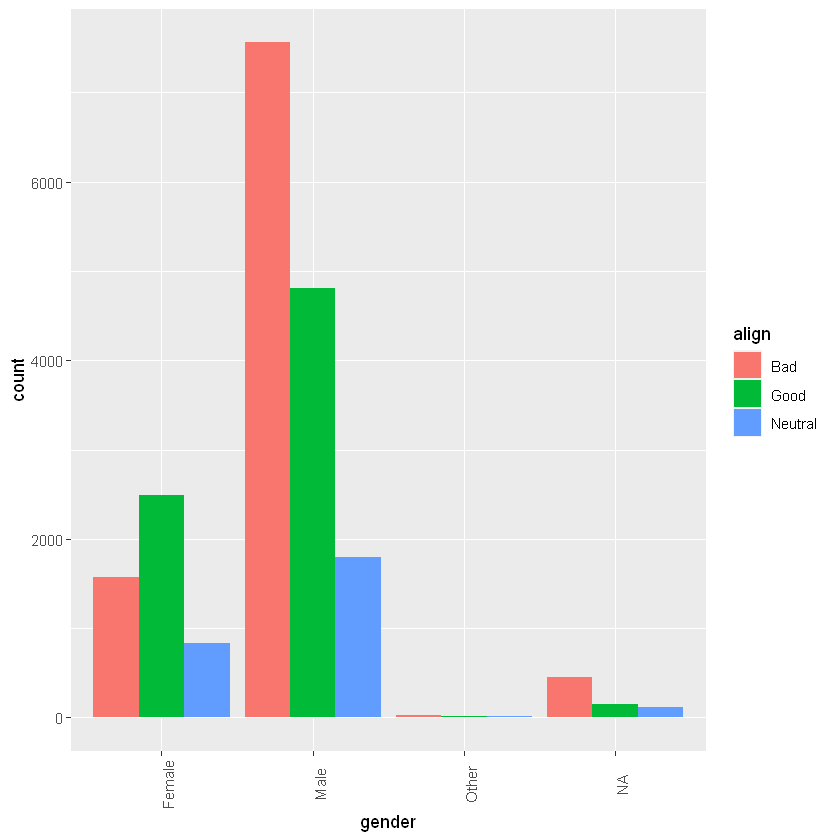

In [13]:
# Create side-by-side barchart of alignment by gender
comics_filtered %>%
    ggplot(aes(x = gender, fill = align)) + 
    geom_bar(position="dodge") +
    theme(axis.text.x = element_text(angle = 90))

- Among characters with "Neutral" alignment, males are the most common.
- In general, there is an association between gender and alignment.
- There are more male characters than female characters in this dataset.

## Counts vs. proportions

> ### From counts to proportions

In [14]:
# simplify display format
options(scipen = 999, digits = 3)
(tab <- table(comics_filtered$id, comics_filtered$align))

         
           Bad Good Neutral
  No Dual  474  647     390
  Public  2172 2930     965
  Secret  4493 2475     959
  Unknown    7    0       2

In [15]:
prop.table(tab)

         
               Bad     Good  Neutral
  No Dual 0.030553 0.041704 0.025139
  Public  0.140003 0.188862 0.062202
  Secret  0.289609 0.159533 0.061815
  Unknown 0.000451 0.000000 0.000129

In [16]:
sum(prop.table(tab))

[1] 1

> ### Conditional proportions

In [17]:
# Condition on the rows (i.e. rows sum to 1)
prop.table(tab, 1)

         
            Bad  Good Neutral
  No Dual 0.314 0.428   0.258
  Public  0.358 0.483   0.159
  Secret  0.567 0.312   0.121
  Unknown 0.778 0.000   0.222

In [18]:
# Condition on the columns (i.e. columns sum to 1)
prop.table(tab, 2)

         
               Bad     Good  Neutral
  No Dual 0.066331 0.106907 0.168394
  Public  0.303946 0.484137 0.416667
  Secret  0.628743 0.408956 0.414076
  Unknown 0.000980 0.000000 0.000864

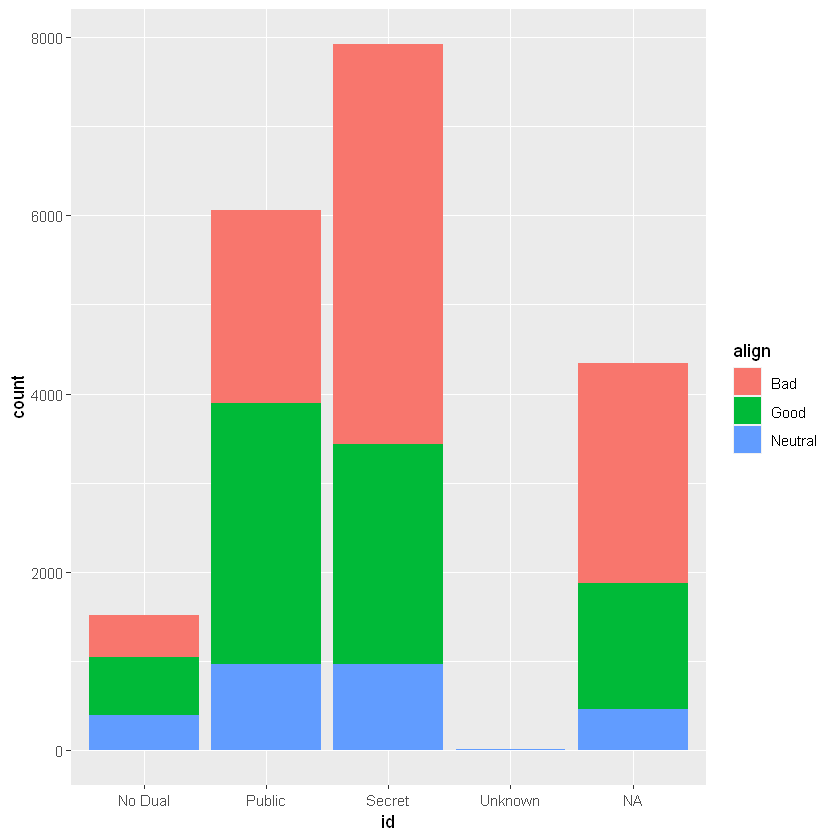

In [19]:
comics_filtered %>%
    ggplot(aes(x=id, fill=align)) +
    geom_bar()

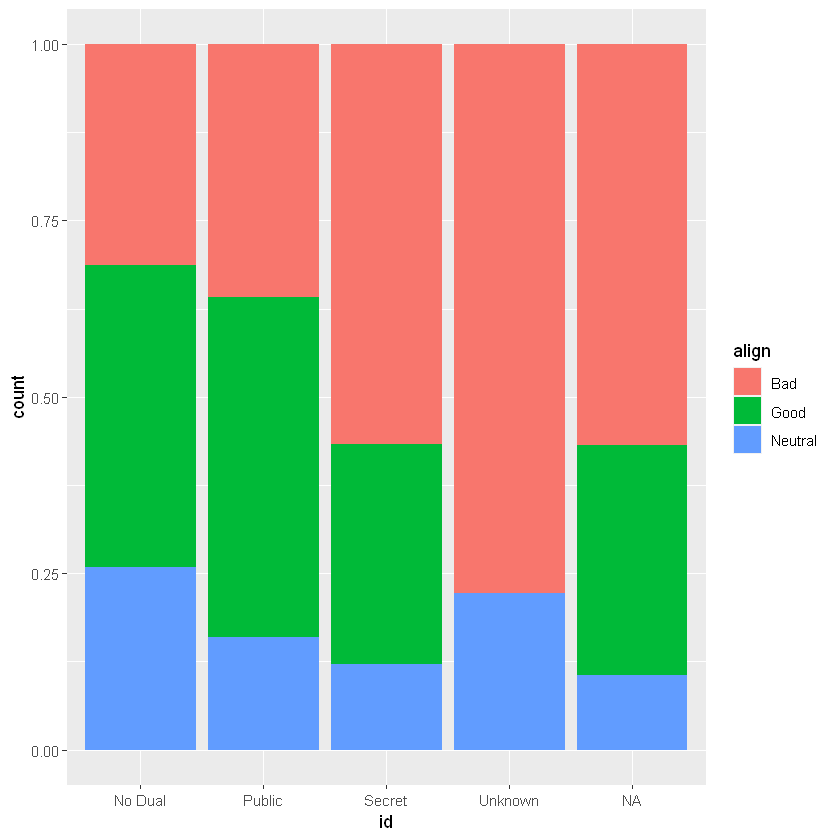

In [20]:
comics_filtered %>%
    ggplot(aes(x=id, fill=align)) +
    geom_bar(position = "fill")

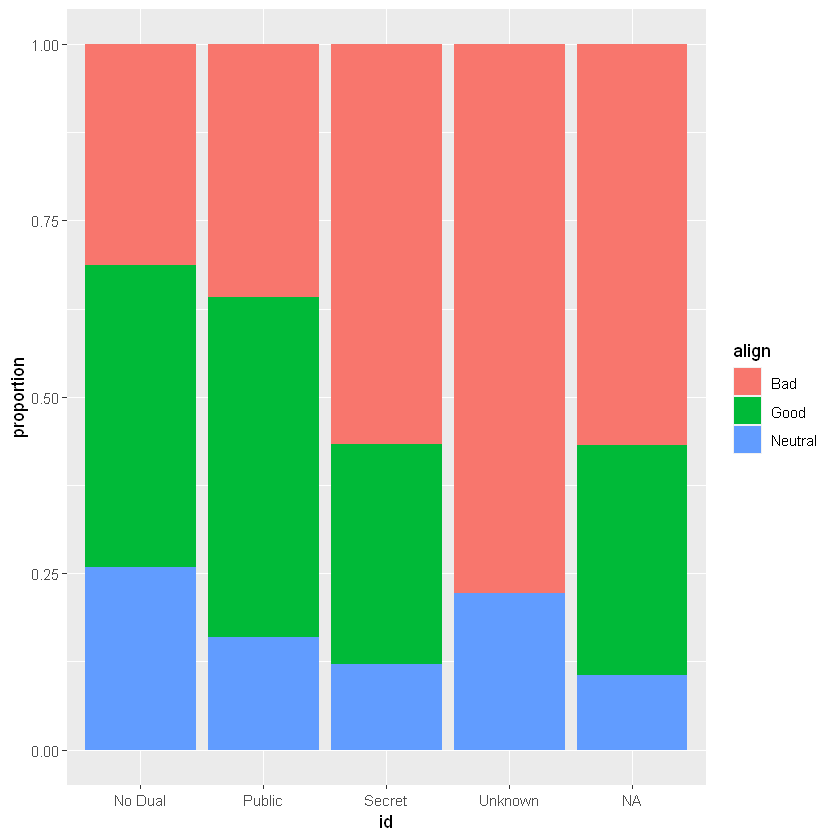

In [21]:
comics_filtered %>%
    ggplot(aes(x=id, fill=align)) +
    geom_bar(position="fill") +
    ylab("proportion")

By adding `position = "fill"` to `geom_bar()`, you are saying you want the bars to fill the entire height of the plotting window, thus displaying proportions and not raw counts.

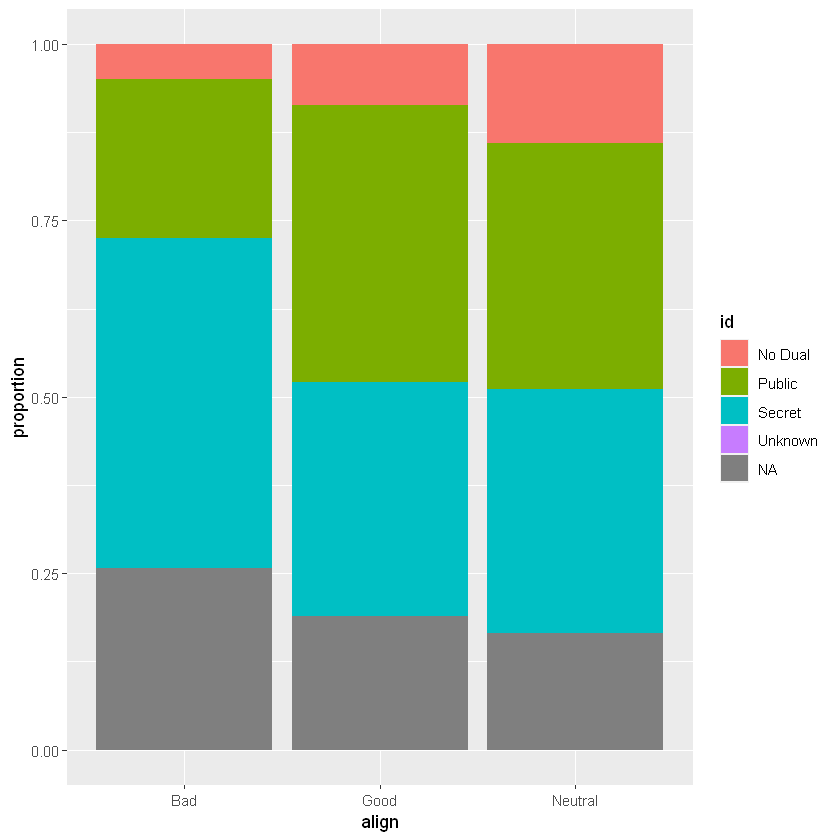

In [22]:
comics_filtered %>%
    ggplot(aes(x=align, fill=id)) +
    geom_bar(position="fill") +
    ylab("proportion")

In [23]:
(tab <- table(comics$align, comics$gender))

                    
                     Female Male Other
  Bad                  1573 7561    32
  Good                 2490 4809    17
  Neutral               836 1799    17
  Reformed Criminals      1    2     0

In [24]:
prop.table(tab)

                    
                        Female      Male     Other
  Bad                0.0821968 0.3950985 0.0016722
  Good               0.1301144 0.2512933 0.0008883
  Neutral            0.0436850 0.0940064 0.0008883
  Reformed Criminals 0.0000523 0.0001045 0.0000000

In [25]:
prop.table(tab, 2)

                    
                       Female     Male    Other
  Bad                0.321020 0.533554 0.484848
  Good               0.508163 0.339355 0.257576
  Neutral            0.170612 0.126949 0.257576
  Reformed Criminals 0.000204 0.000141 0.000000

Approximately 51% of all female characters are good?

### Counts vs. proportions (2)

Bar charts can tell dramatically different stories depending on whether they represent counts or proportions and, if proportions, what the proportions are conditioned on. To demonstrate this difference, we'll construct two barcharts one of counts and one of proportions.

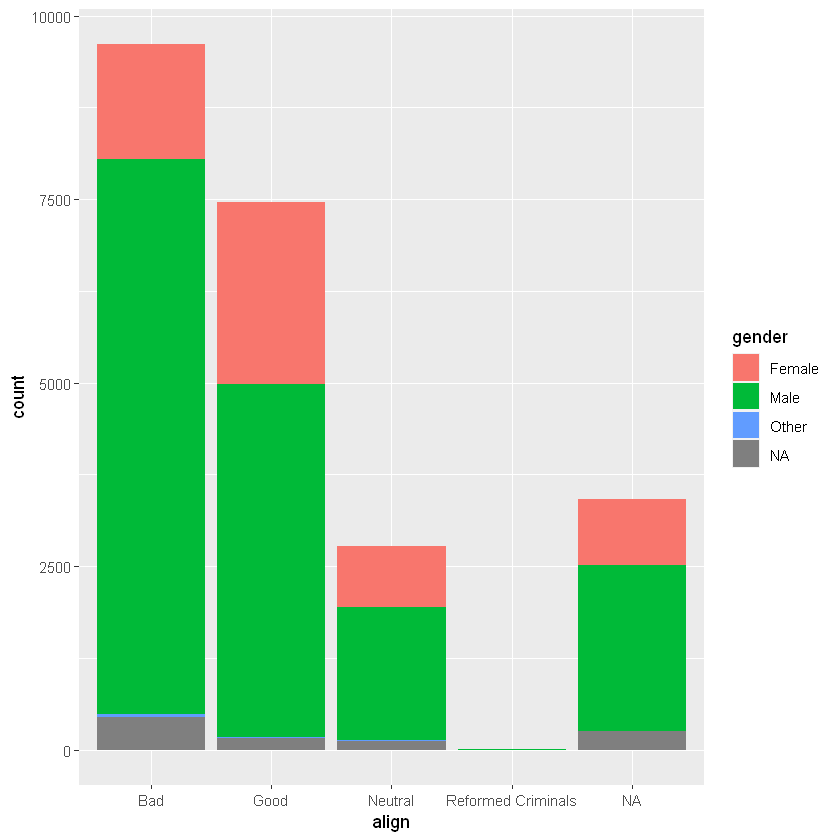

In [26]:
# Plot of gender by align
ggplot(comics, aes(x = align, fill = gender)) +
  geom_bar()

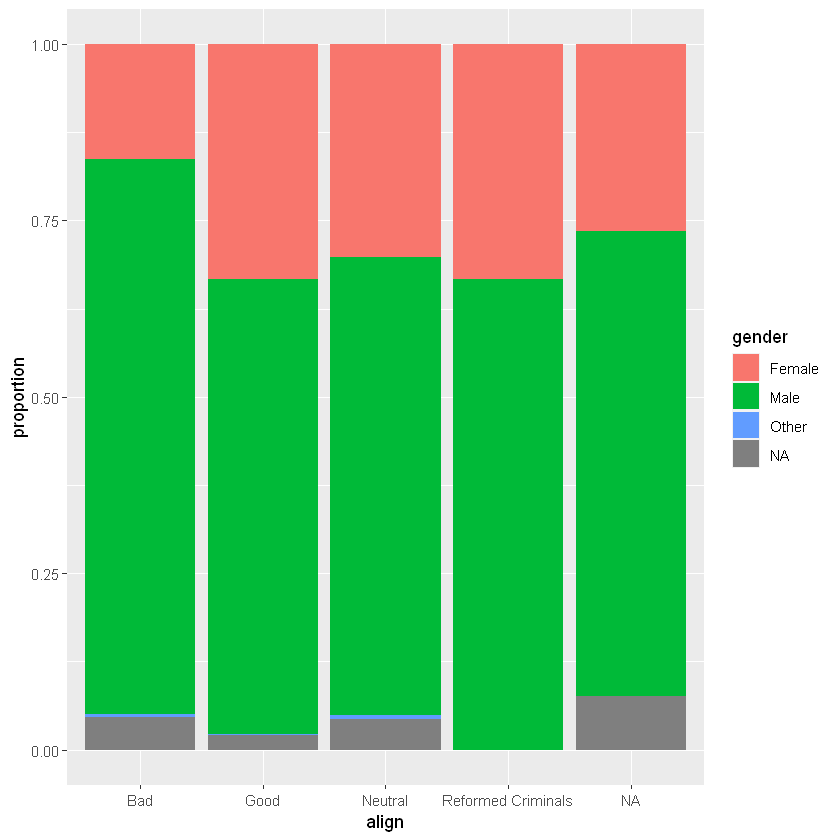

In [27]:
# Plot proportion of gender, conditional on align
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "fill") +
  ylab("proportion")

## Distribution of one variable

> ### Marginal distribution

In [28]:
table(comics$id)


No Dual  Public  Secret Unknown 
   1788    6994    8698       9 

In [29]:
(tab <- table(comics_filtered$id, comics_filtered$align))

         
           Bad Good Neutral
  No Dual  474  647     390
  Public  2172 2930     965
  Secret  4493 2475     959
  Unknown    7    0       2

> ### Simple barchart

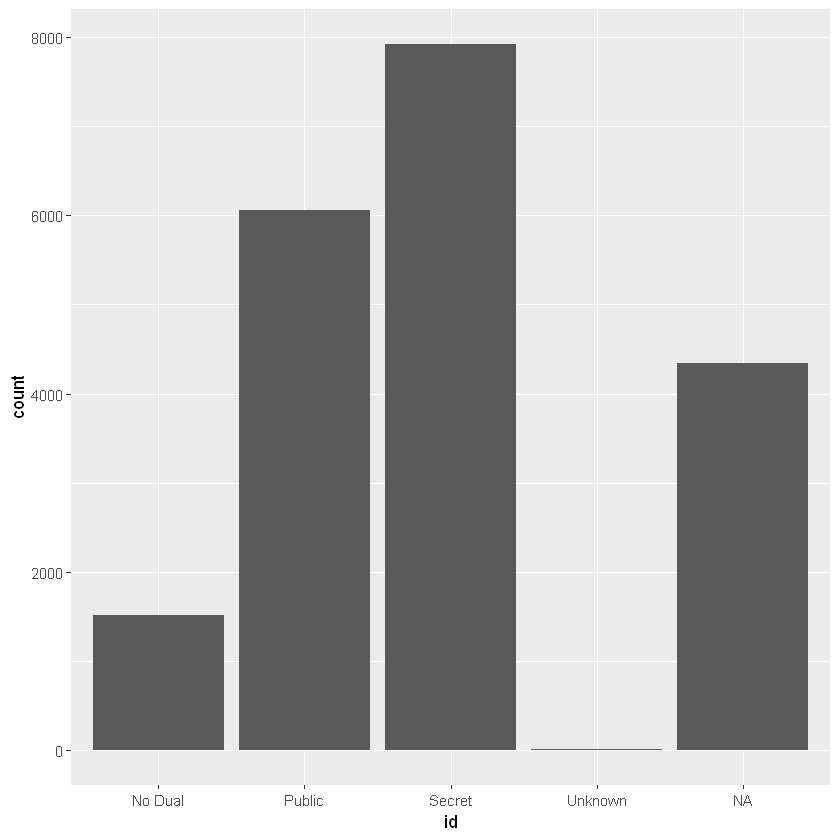

In [30]:
comics_filtered %>%
    ggplot(aes(x=id)) +
    geom_bar()

> ### Faceted barcharts

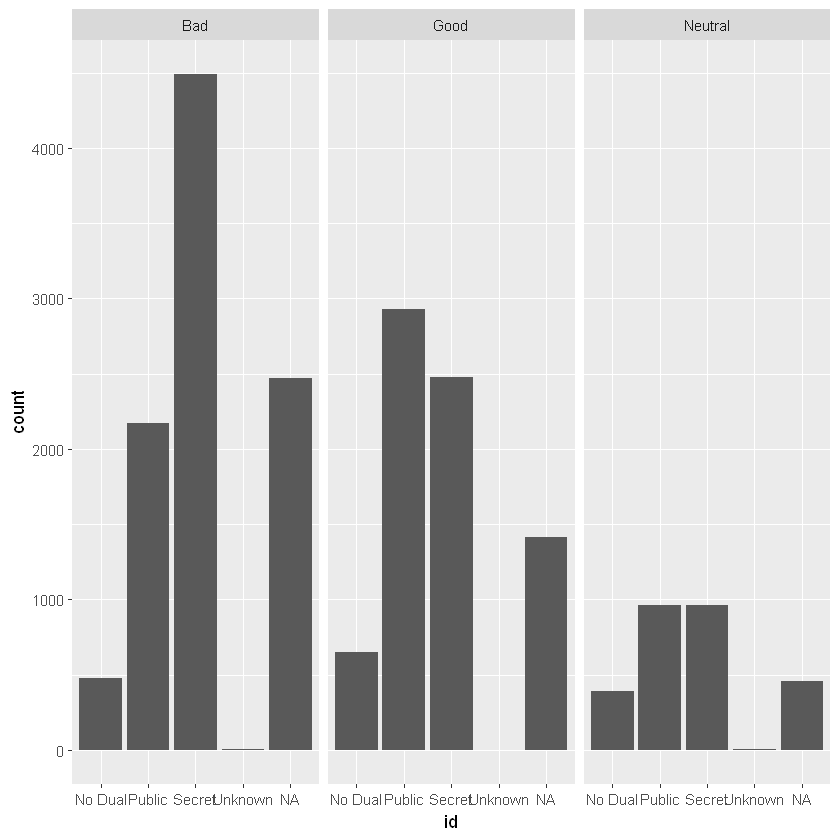

In [31]:
comics_filtered %>%
    ggplot(aes(x=id)) +
    geom_bar() +
    facet_wrap(~align)

### Marginal barchart

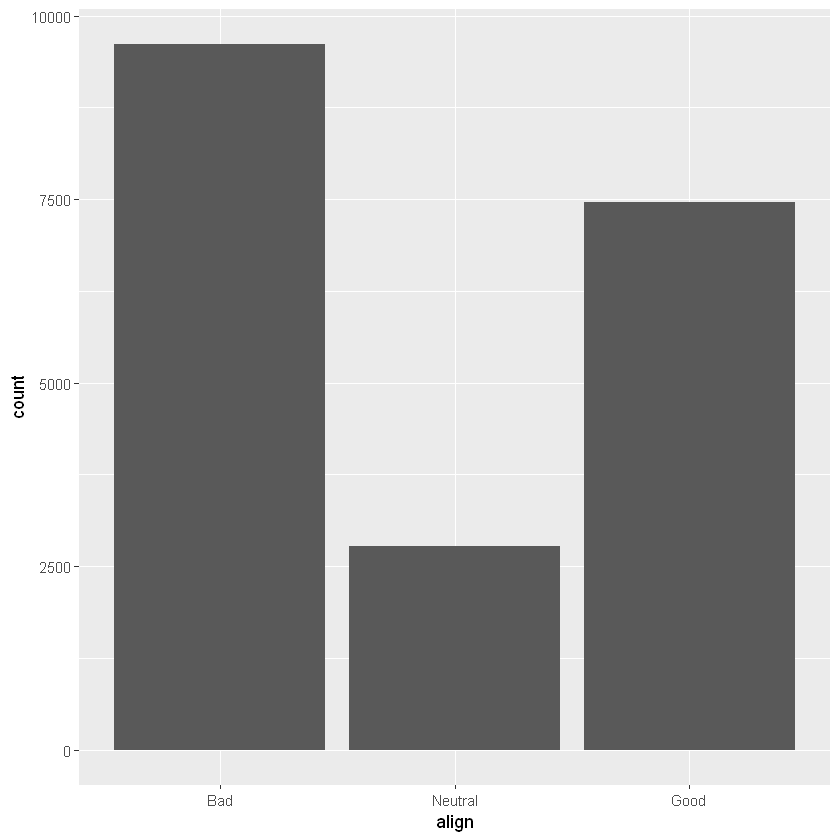

In [32]:
# Change the order of the levels in align
comics <- comics_filtered

comics$align <- factor(comics$align, 
                       levels = c("Bad", "Neutral", "Good"))

# Create plot of align
ggplot(comics, aes(x = align)) + 
  geom_bar()

### Conditional barchart

Now, if we want to break down the distribution of alignment based on gender, we're looking for conditional distributions.

We could make these by creating multiple filtered datasets (one for each gender) or by faceting the plot of alignment based on gender.

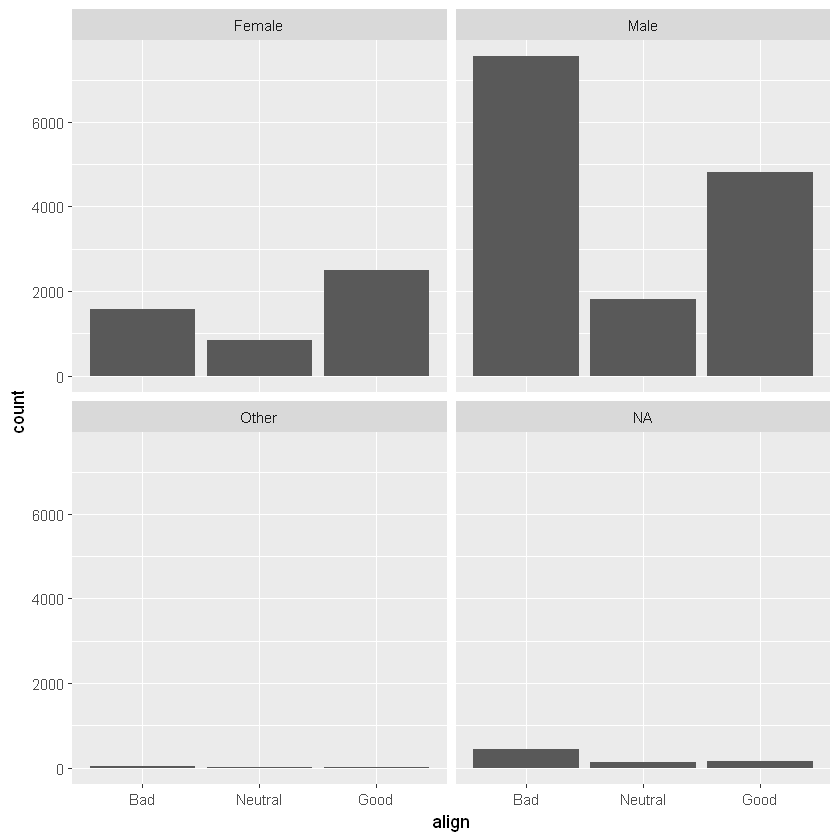

In [33]:
# Plot of alignment broken down by gender
ggplot(comics, aes(x = align)) + 
  geom_bar() +
  facet_wrap(~ gender)

### Improve piechart

The piechart is a very common way to represent the distribution of a single categorical variable, but they can be more difficult to interpret than barcharts.

# Exploring Numerical Data

We will explore how to graphically summarize numerical data.

> ### Cars dataset
records characteristics on all of the new models of cars for sale in the US in a certain year.

In [34]:
cars <- read_csv("datasets/cars.csv")
head(cars)

Parsed with column specification:
cols(
  name = col_character(),
  sports_car = col_logical(),
  suv = col_logical(),
  wagon = col_logical(),
  minivan = col_logical(),
  pickup = col_logical(),
  all_wheel = col_logical(),
  rear_wheel = col_logical(),
  msrp = col_double(),
  dealer_cost = col_double(),
  eng_size = col_double(),
  ncyl = col_double(),
  horsepwr = col_double(),
  city_mpg = col_double(),
  hwy_mpg = col_double(),
  weight = col_double(),
  wheel_base = col_double(),
  length = col_double(),
  width = col_double()
)


name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
Chevrolet Aveo 4dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,11690,10965,1.6,4,103,28,34,2370,98,167,66
Chevrolet Aveo LS 4dr hatch,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,12585,11802,1.6,4,103,28,34,2348,98,153,66
Chevrolet Cavalier 2dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,14610,13697,2.2,4,140,26,37,2617,104,183,69
Chevrolet Cavalier 4dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,14810,13884,2.2,4,140,26,37,2676,104,183,68
Chevrolet Cavalier LS 2dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,16385,15357,2.2,4,140,26,37,2617,104,183,69
Dodge Neon SE 4dr,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,13670,12849,2.0,4,132,29,36,2581,105,174,67


In [35]:
glimpse(cars)

Rows: 428
Columns: 19
$ name        <chr> "Chevrolet Aveo 4dr", "Chevrolet Aveo LS 4dr hatch", "C...
$ sports_car  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,...
$ suv         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,...
$ wagon       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,...
$ minivan     <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,...
$ pickup      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,...
$ all_wheel   <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,...
$ rear_wheel  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,...
$ msrp        <dbl> 11690, 12585, 14610, 14810, 16385, 13670, 15040, 13270,...
$ dealer_cost <dbl> 10965, 11802, 13697, 13884, 15357, 12849, 14086, 12482,...
$ eng_size    <dbl> 1.6, 1.6, 2.2, 2.2, 2.2, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...
$ ncyl        <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...
$ horsepwr    <dbl> 103, 103, 

> ### Dotplot

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (stat_bindot)."

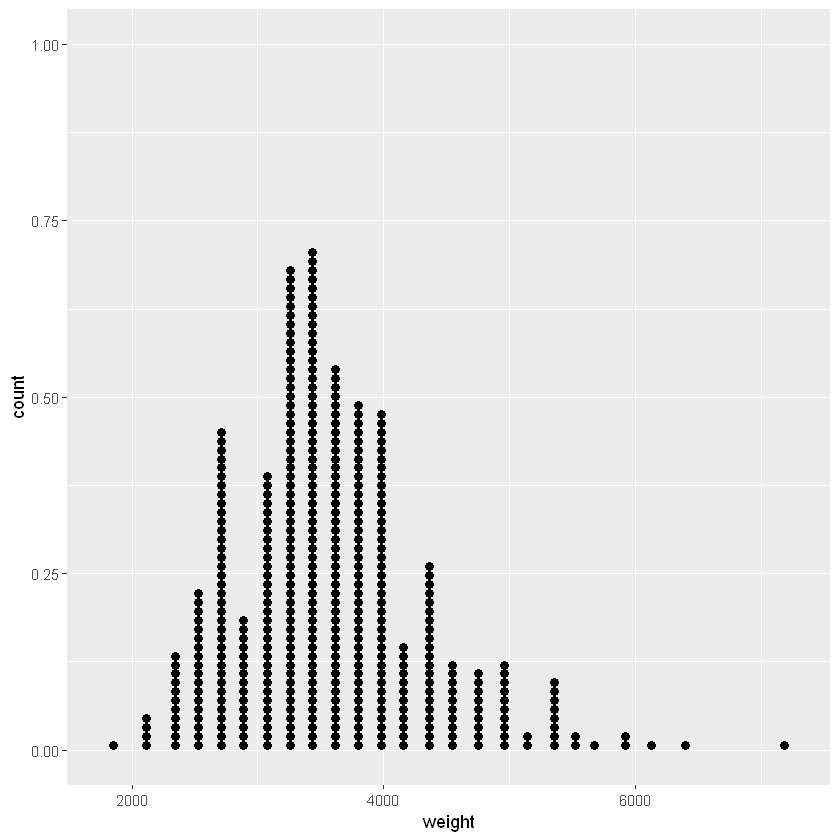

In [36]:
cars %>%
    ggplot(aes(x=weight)) +
    geom_dotplot(dotsize=.4)

> ### Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

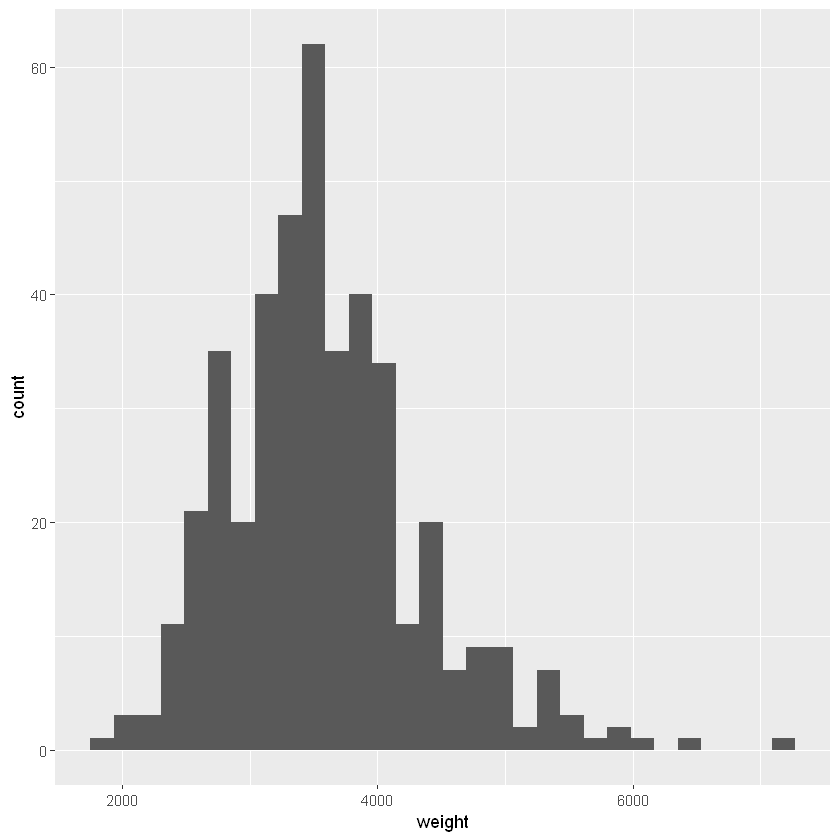

In [37]:
cars %>%
    ggplot(aes(x=weight)) +
    geom_histogram()

> ### Density plot

Warning message:
"Removed 2 rows containing non-finite values (stat_density)."

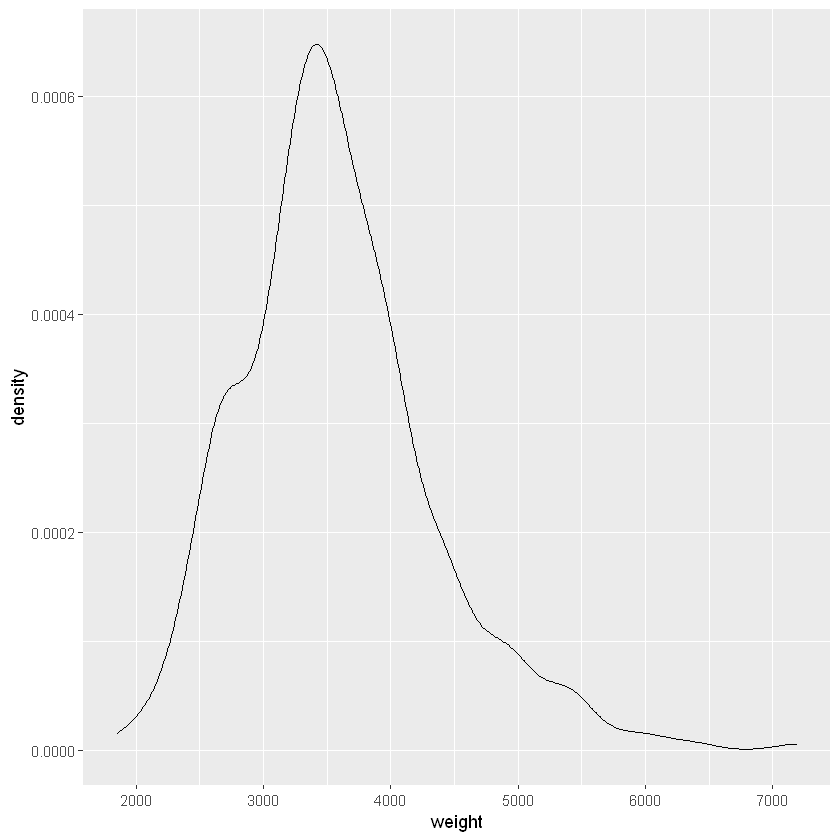

In [38]:
cars %>%
    ggplot(aes(x=weight)) +
    geom_density()

> ### Boxplot

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."

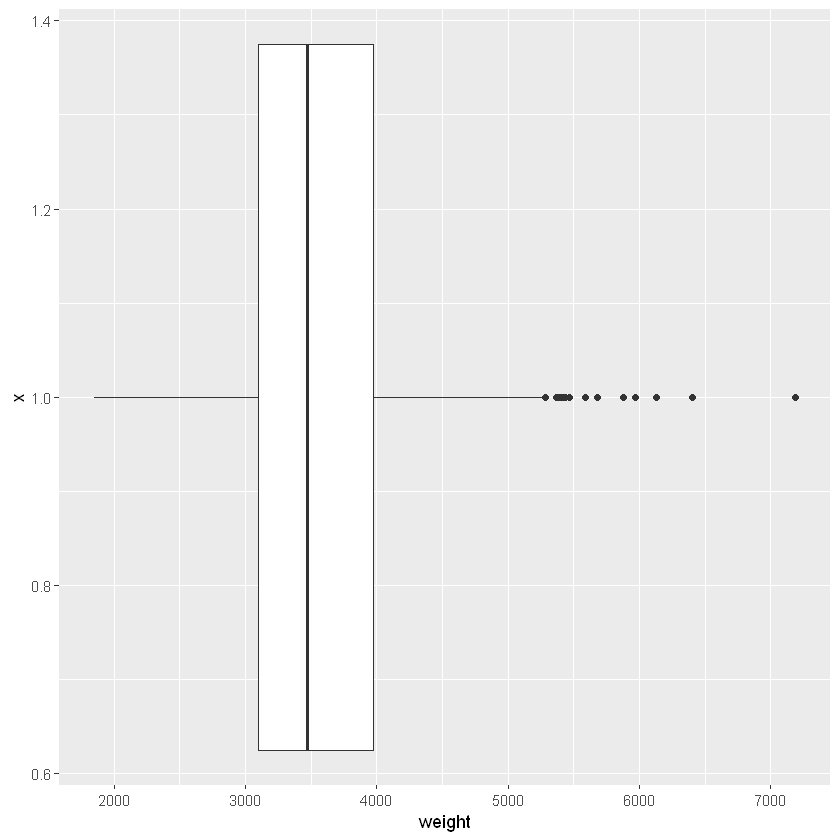

In [40]:
cars %>%
    ggplot(aes(x=1, y=weight)) +
    geom_boxplot() + 
    coord_flip()

> ### Faceted histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

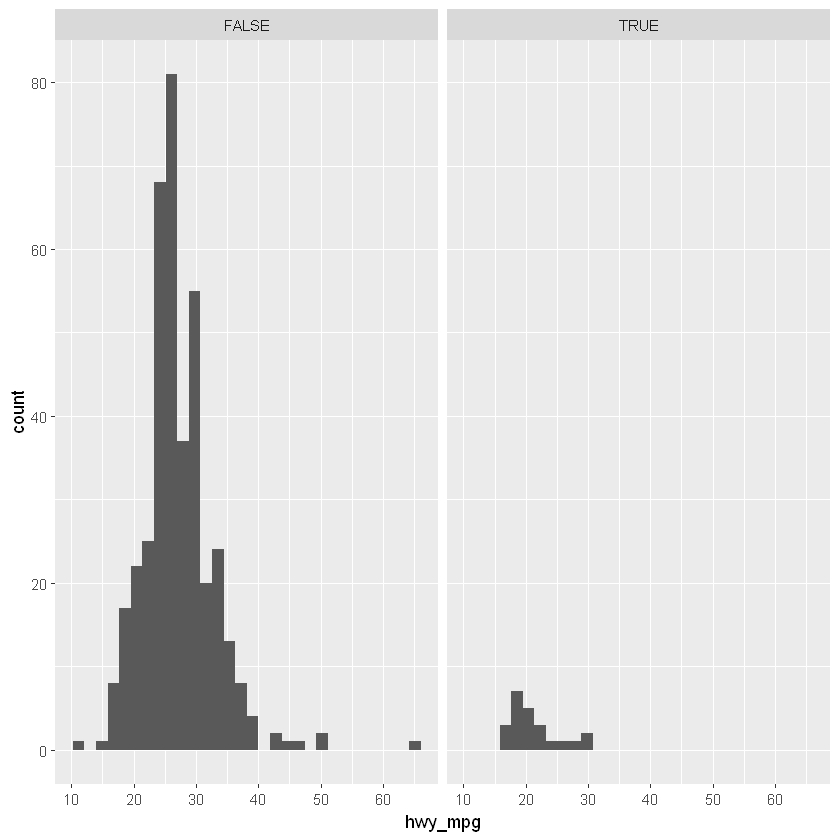

In [41]:
cars %>%
    ggplot(aes(x=hwy_mpg)) +
    geom_histogram() +
    facet_wrap(~pickup)

### Faceted histogram

We will investigate the distribution of mileage across a categorial variable

**a histogram of `city_mpg` faceted by `suv`, a logical variable indicating whether the car is an SUV or not.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

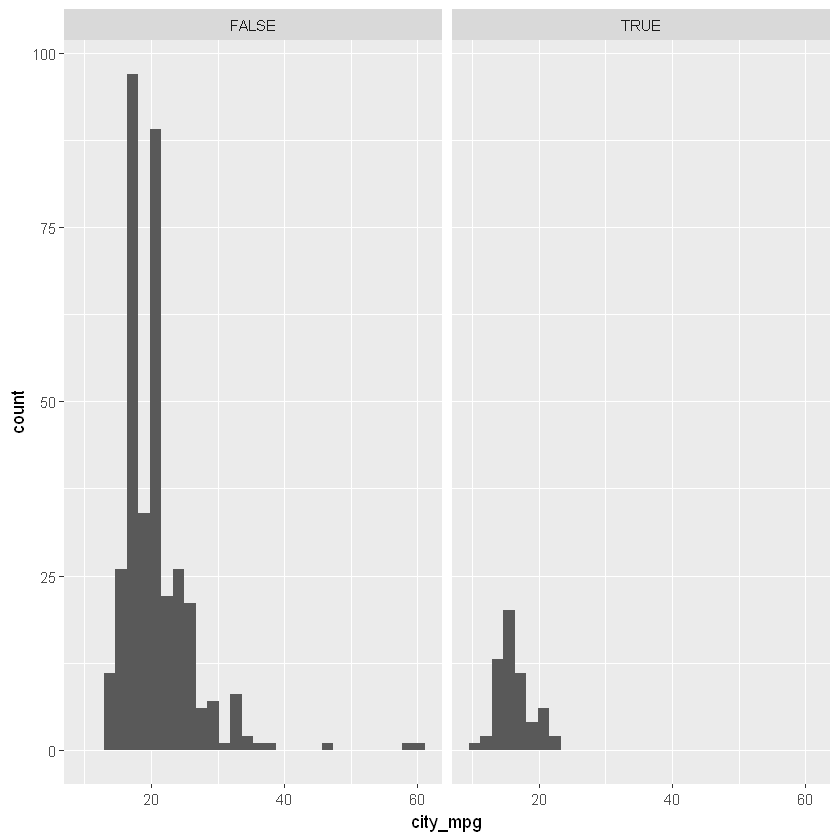

In [42]:
# Create faceted histogram
ggplot(cars, aes(x = city_mpg)) +
  geom_histogram() +
  facet_wrap(~ suv)

### Boxplots and density plots

The mileage of a car tends to be associated with the size of its engine (as measured by the number of cylinders). To explore the relationship between these two variables, we could stick to using histograms, but we'll try two alternatives: the box plot and the density plot.

In [43]:
unique(cars$ncyl)

[1]  4  6  3  8  5 12 10 -1

Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."

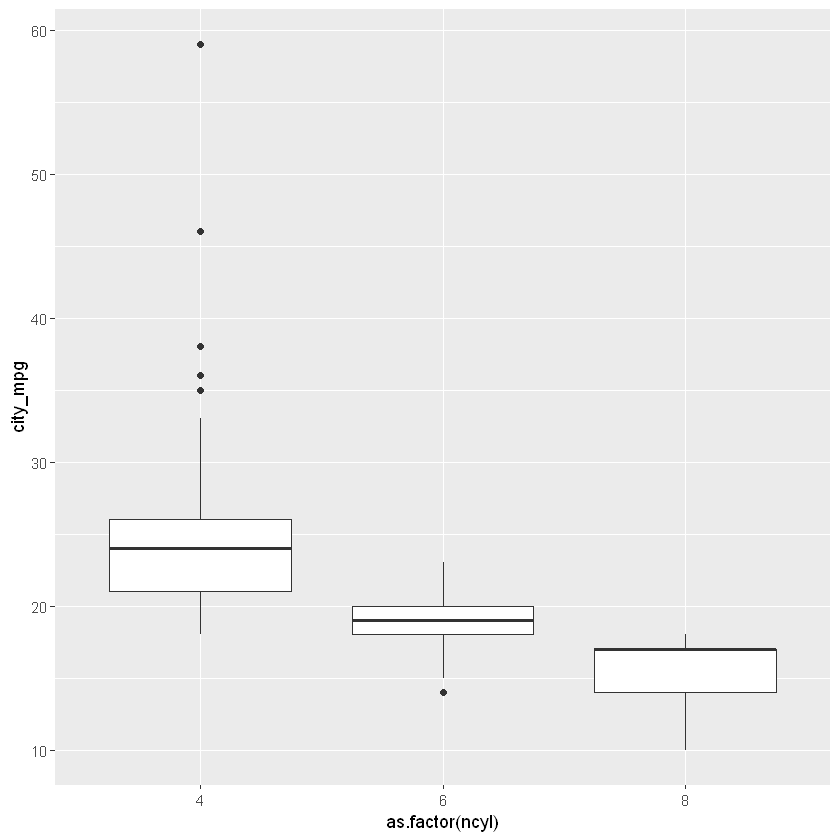

In [44]:
# Filter cars with 4, 6, 8 cylinders
common_cyl <- filter(cars, ncyl %in% c(4,6,8))

# Create box plots of city mpg by ncyl
ggplot(common_cyl, aes(x = as.factor(ncyl), y = city_mpg)) +
  geom_boxplot()

Warning message:
"Removed 11 rows containing non-finite values (stat_density)."

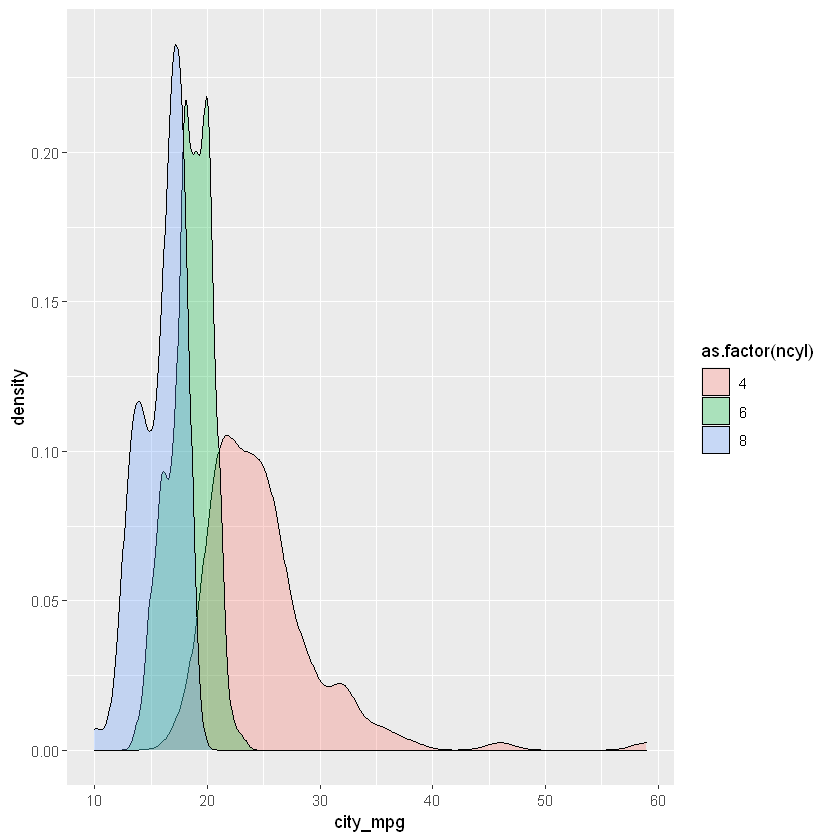

In [45]:
# Create overlaid density plots for same data
ggplot(common_cyl, aes(x = city_mpg, fill = as.factor(ncyl))) +
  geom_density(alpha = .3)

- The variability in mileage of 8 cylinder cars seem much smaller than that of 4 cylinder cars.
- The highest mileage cars have 4 cylinders.
- The typical 4 cylinder car gets better mileage than the typical 6 cylinder car, which gets better mileage than the typical 8 cylinder car.
- Most of the 4 cylinder cars get better mileage than even the most efficient 8 cylinder cars.

## Distribution of one variable


> ### Marginal vs. conditional

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

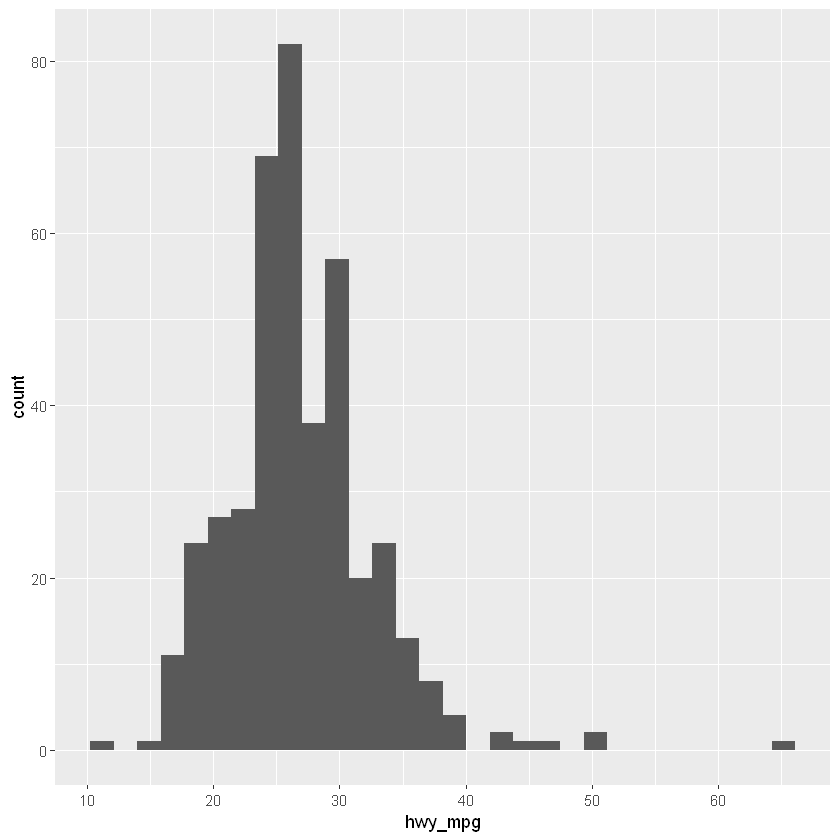

In [46]:
cars %>%
    ggplot(aes(x=hwy_mpg)) +
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

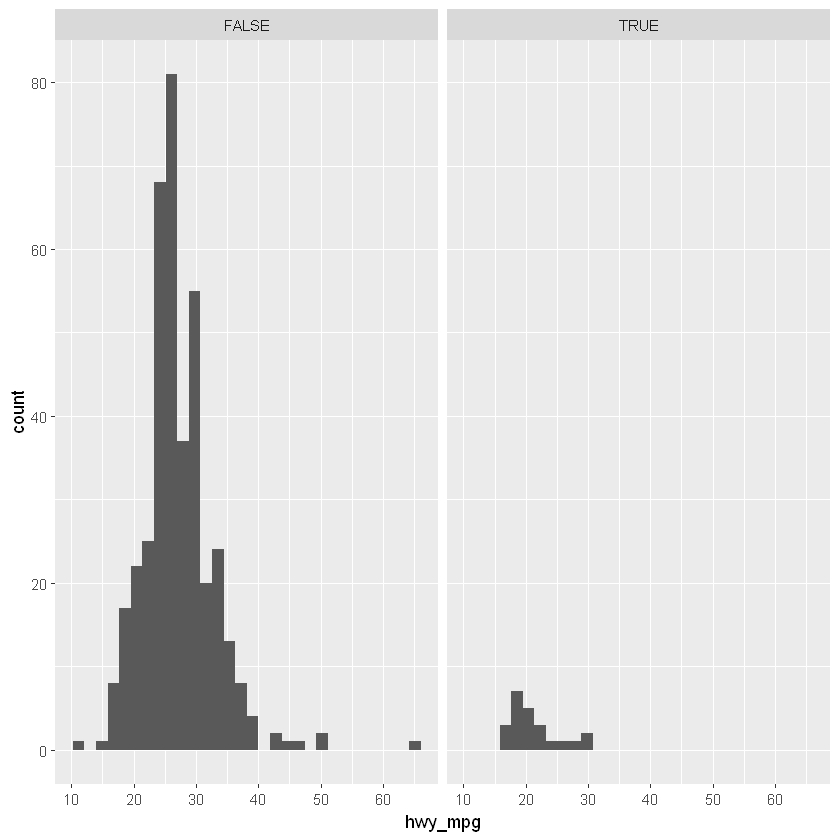

In [47]:
cars %>%
    ggplot(aes(x=hwy_mpg)) +
    geom_histogram() +
    facet_wrap(~pickup)

> ### Building a data pipeline

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


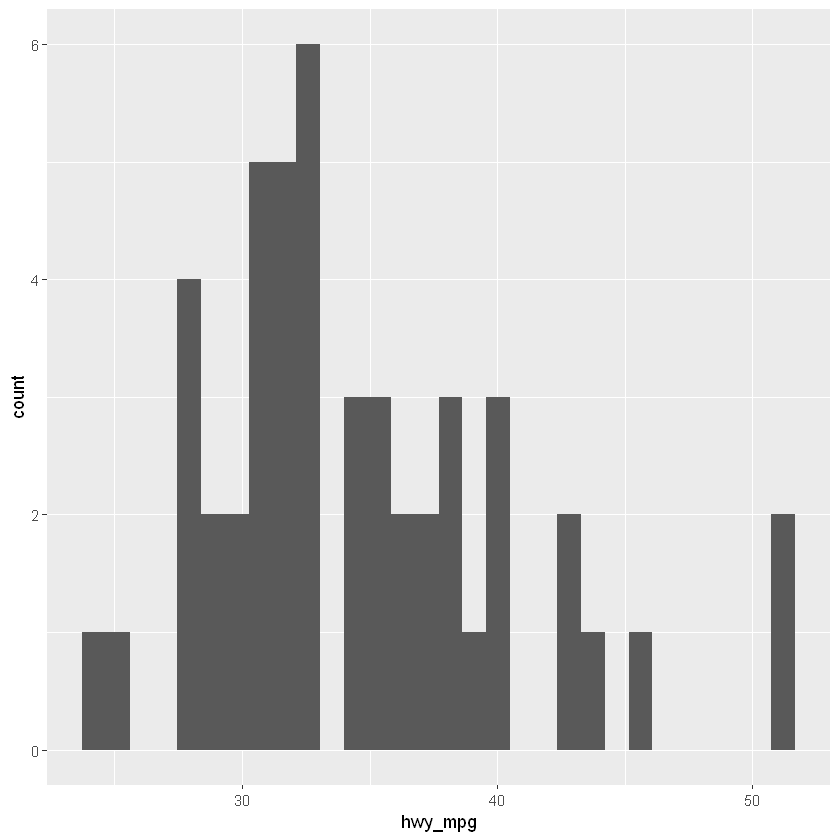

In [48]:
cars %>%
    filter(eng_size<2) %>%
        ggplot(aes(x=hwy_mpg)) +
        geom_histogram()

> ### Wide bin width


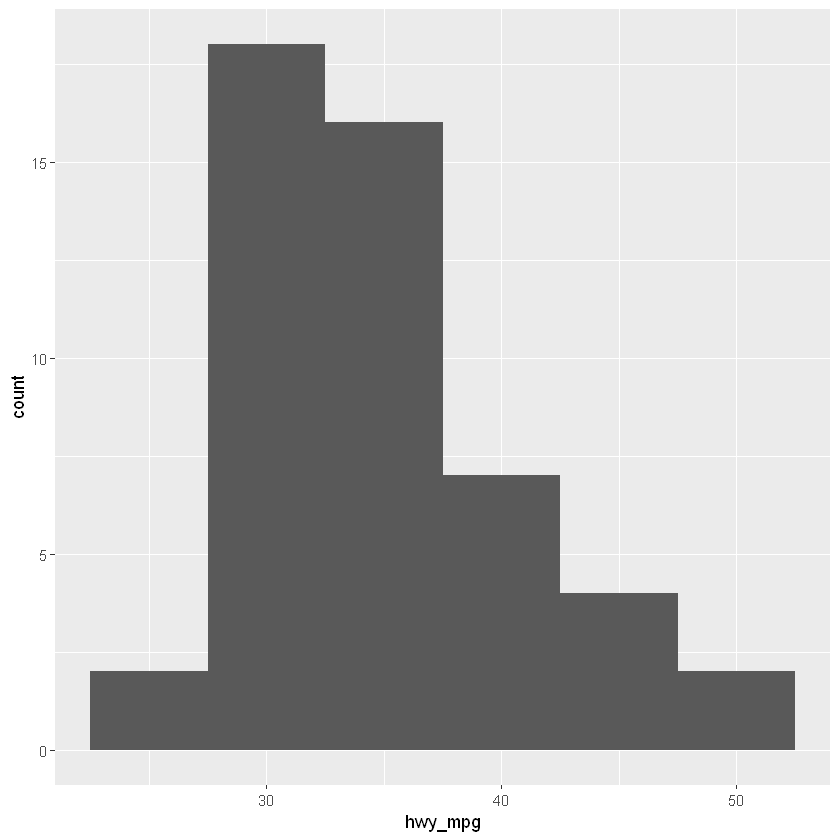

In [49]:
cars %>%     
    filter(eng_size < 2.0) %>%    
        ggplot(aes(x = hwy_mpg)) +     
        geom_histogram(binwidth = 5)

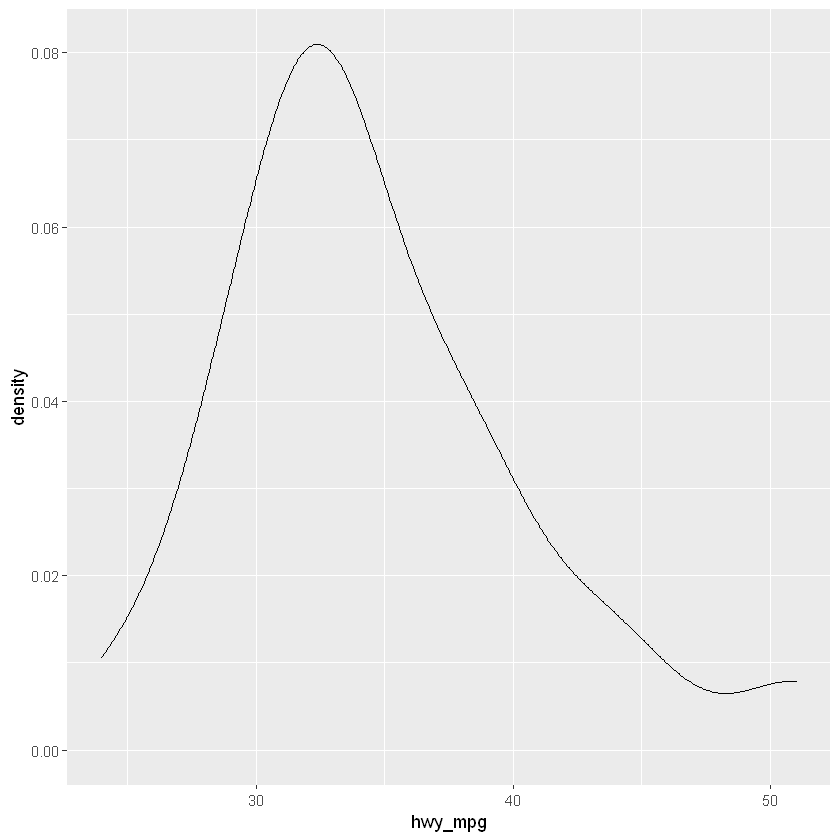

In [50]:
cars %>%     
    filter(eng_size < 2.0) %>%    
        ggplot(aes(x = hwy_mpg)) +     
        geom_density()

> ### Wide bandwidth

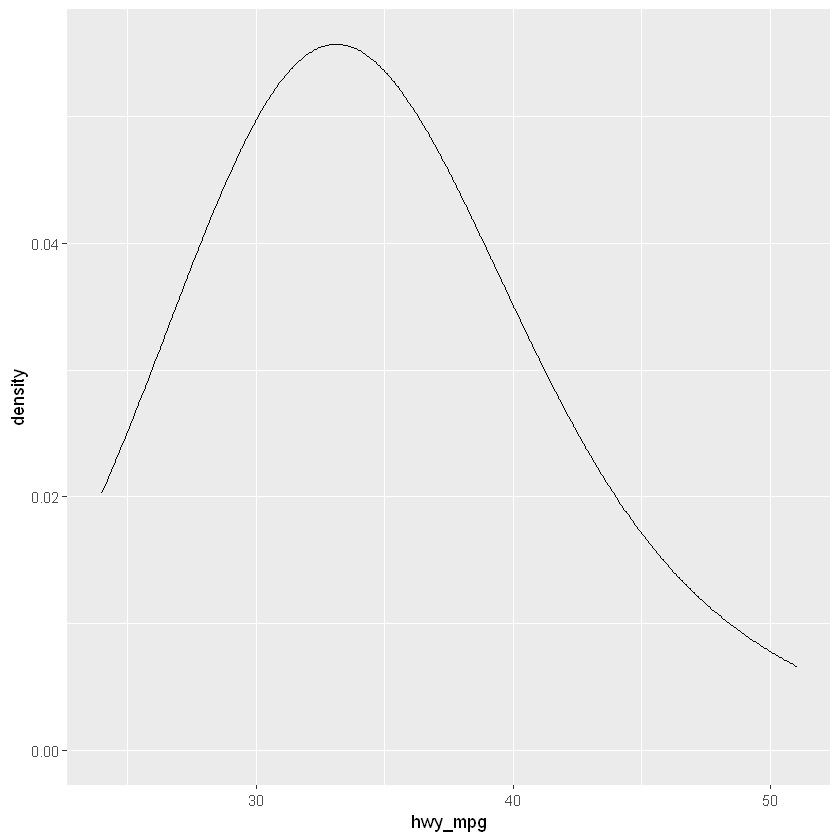

In [51]:
cars %>%     
    filter(eng_size < 2.0) %>%    
        ggplot(aes(x = hwy_mpg)) +     
        geom_density(bw=5)

### Marginal and conditional histograms

`horsepwr`. The goal is to get a sense of the marginal distribution of this variable and then compare it to the distribution of horsepower conditional on the price of the car being less than \$25,000.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


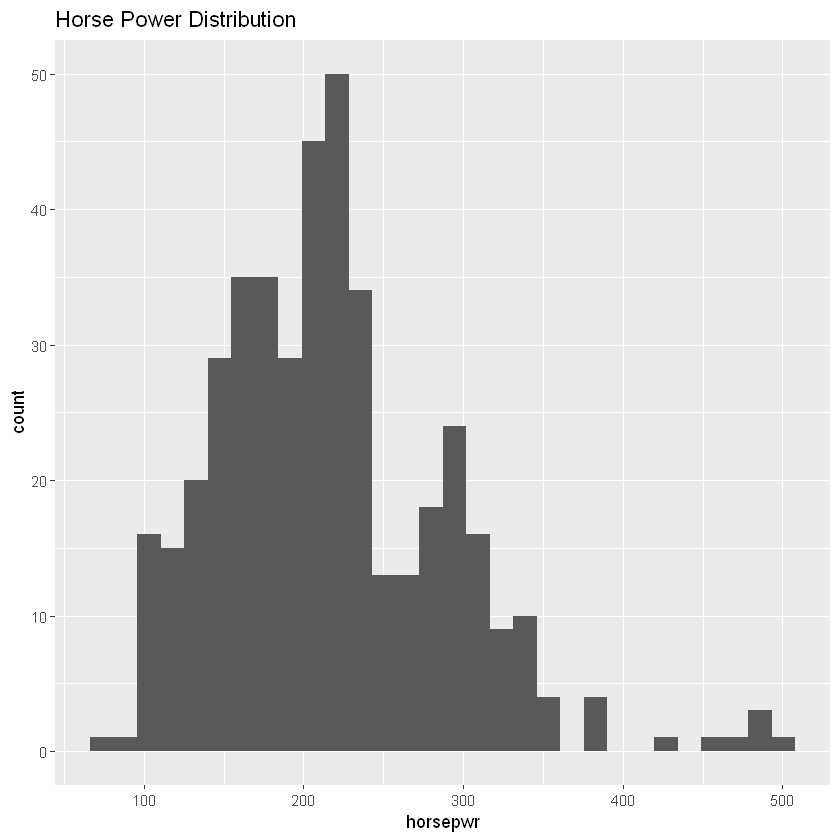

In [52]:
# Create hist of horsepwr
cars %>%
  ggplot(aes(x=horsepwr)) +
  geom_histogram() +
  ggtitle("Horse Power Distribution")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

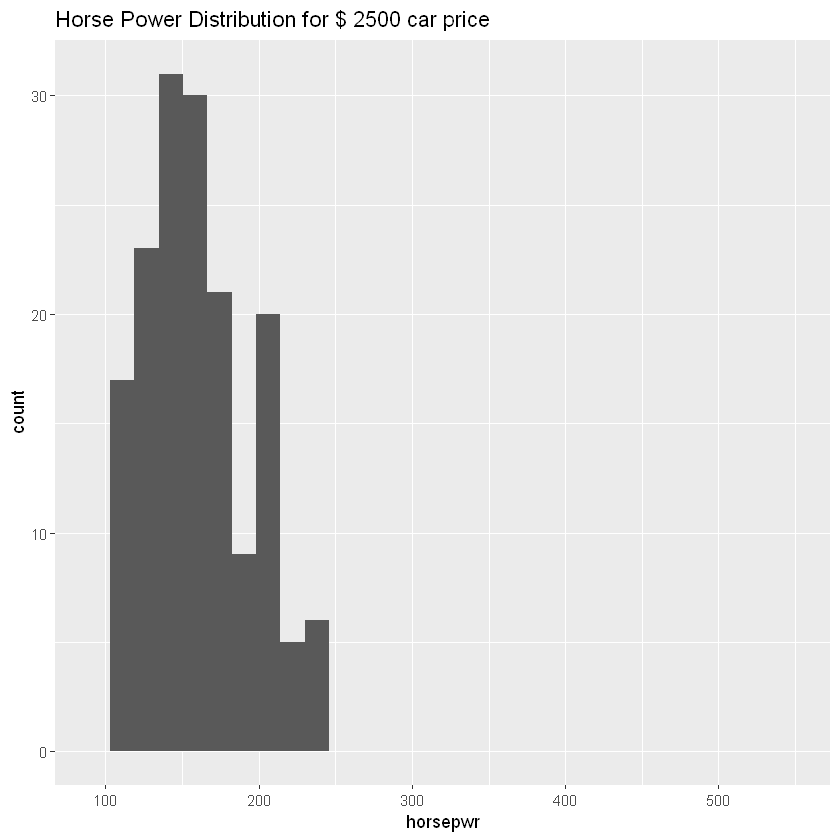

In [53]:
# Create hist of horsepwr for affordable cars
cars %>% 
  filter(msrp < 25000) %>%
  ggplot(aes(x=horsepwr)) +
  geom_histogram() +
  xlim(c(90, 550)) +
  ggtitle("Horse Power Distribution for $ 2500 car price")

The highest horsepower car in the less expensive range has just under 250 horsepower.

### Three binwidths

The binwidth determines how smooth your distribution will appear: the smaller the binwidth, the more jagged your distribution becomes.

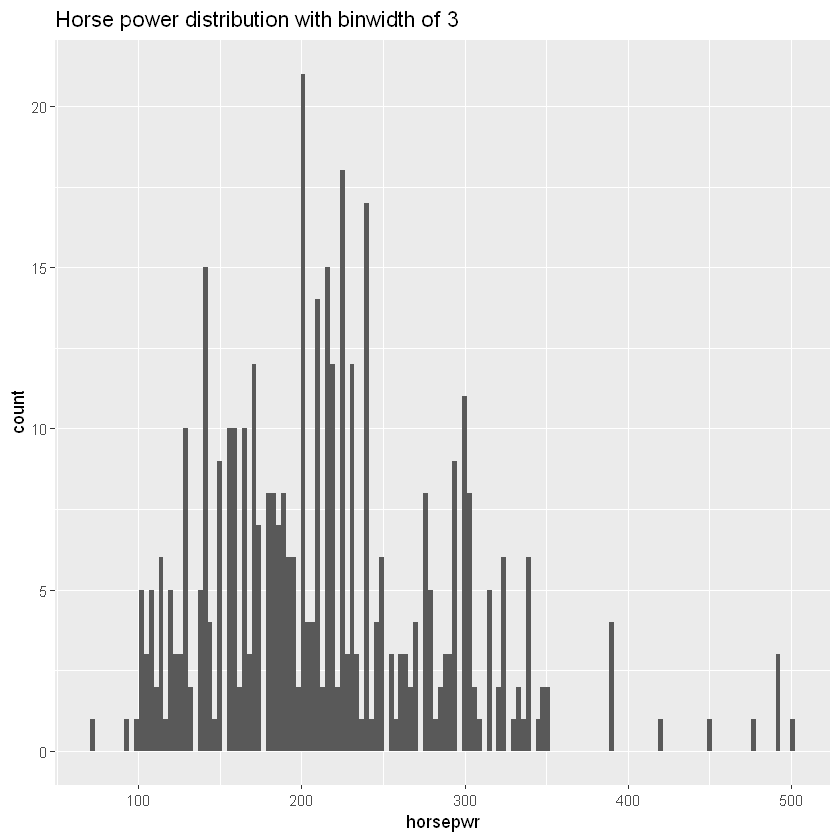

In [54]:
# Create hist of horsepwr with binwidth of 3
cars %>%
  ggplot(aes(x=horsepwr)) +
  geom_histogram(binwidth = 3) +
  ggtitle("Horse power distribution with binwidth of 3")

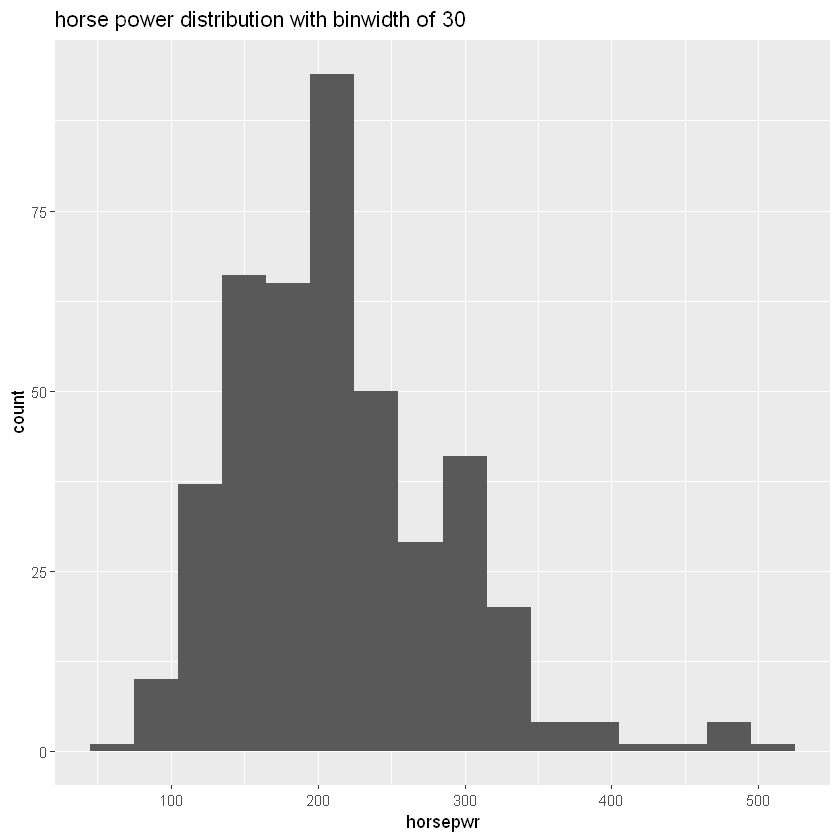

In [55]:
# Create hist of horsepwr with binwidth of 30
cars %>%
  ggplot(aes(x=horsepwr)) + 
  geom_histogram(binwidth=30)+
  ggtitle("horse power distribution with binwidth of 30")



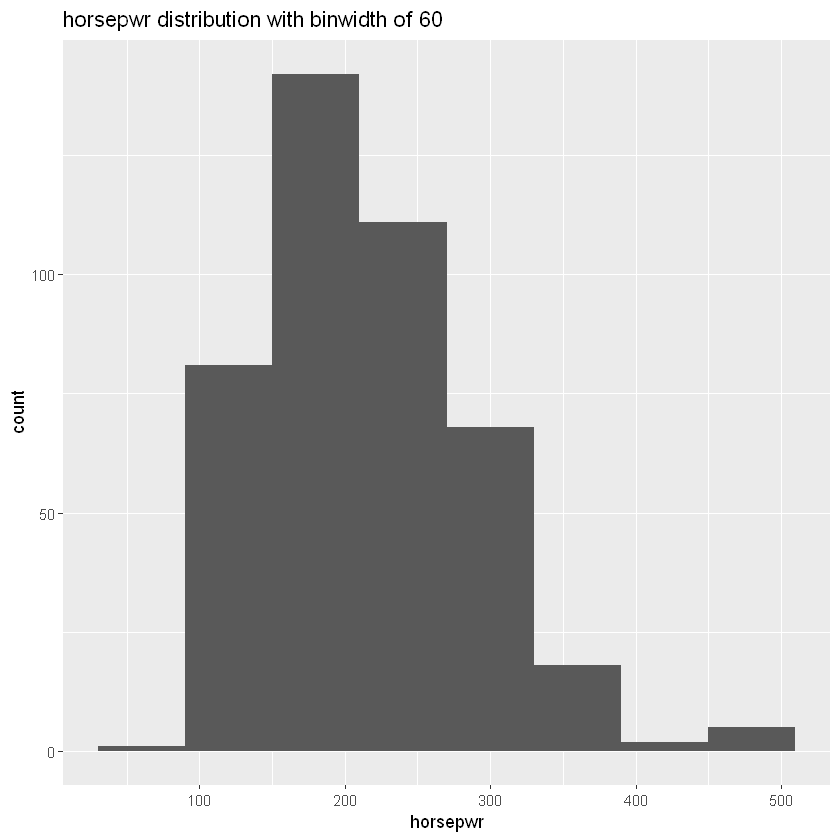

In [56]:
# Create hist of horsepwr with binwidth of 60
cars %>%
  ggplot(aes(x=horsepwr))+
  geom_histogram(binwidth=60)+
  ggtitle("horsepwr distribution with binwidth of 60")

## Box plots

> ### Side-by-side box plots

Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."

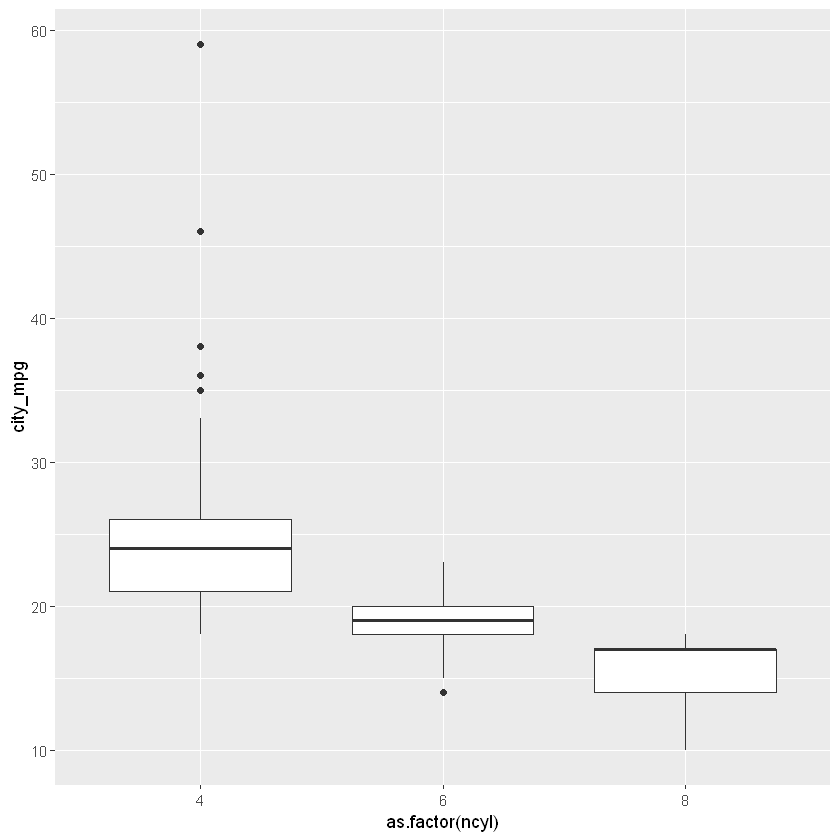

In [58]:
common_cyl %>%
    ggplot(aes(x=as.factor(ncyl), y=city_mpg))+
    geom_boxplot()

### Box plots for outliers

In addition to indicating the center and spread of a distribution, a box plot provides a graphical means to detect outliers. We can apply this method to the `msrp` column (manufacturer's suggested retail price) to detect if there are unusually expensive or cheap cars.

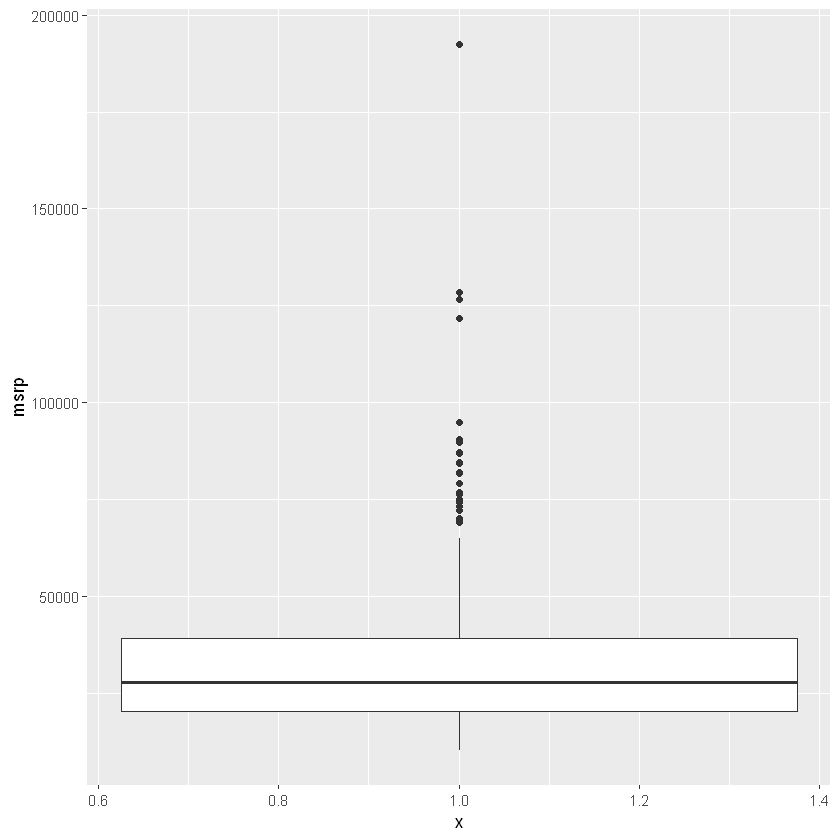

In [59]:
# Construct box plot of msrp
cars %>%
  ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot()

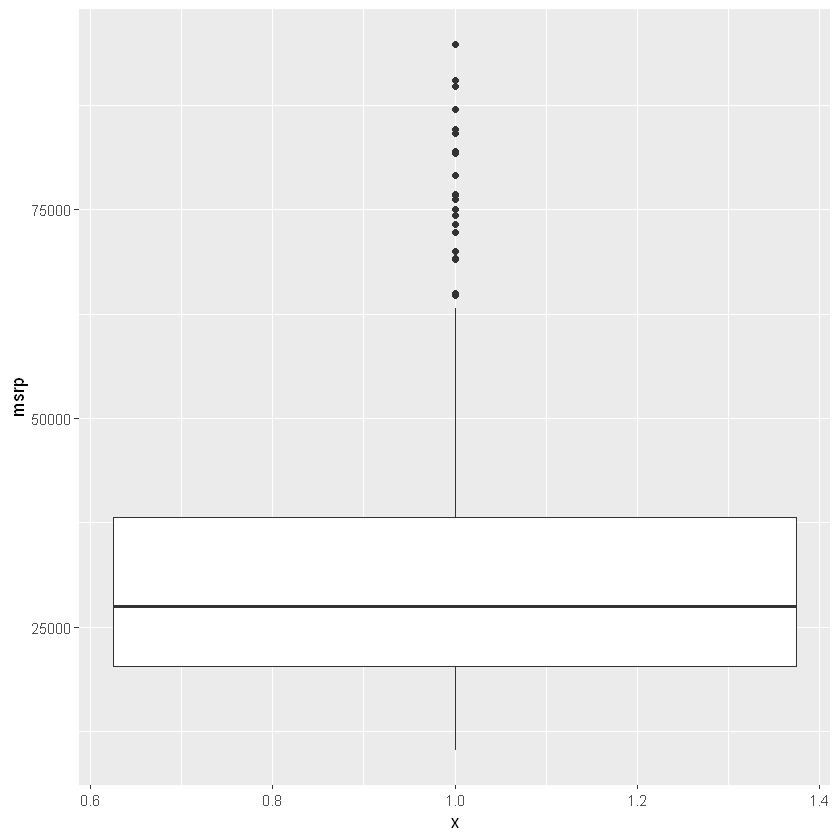

In [60]:
# Exclude outliers from data
# Construct box plot of msrp using the reduced dataset
cars %>%
    filter(msrp<100000)%>%
        ggplot(aes(x=1, y=msrp)) +
        geom_boxplot()

### Plot selection

Both density plots and box plots display the central tendency and spread of the data, but the box plot is more robust to outliers.

Warning message:
"Removed 14 rows containing non-finite values (stat_boxplot)."

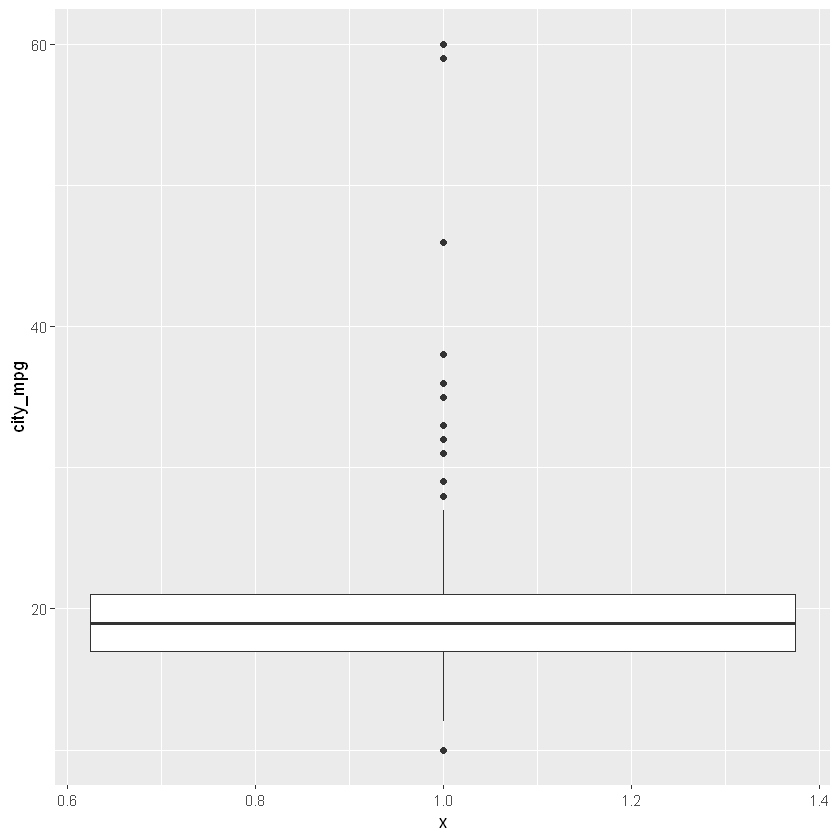

In [61]:
# Create plot of city_mpg
cars %>%
  ggplot(aes(x=1, y=city_mpg)) +
  geom_boxplot()

Warning message:
"Removed 28 rows containing non-finite values (stat_density)."

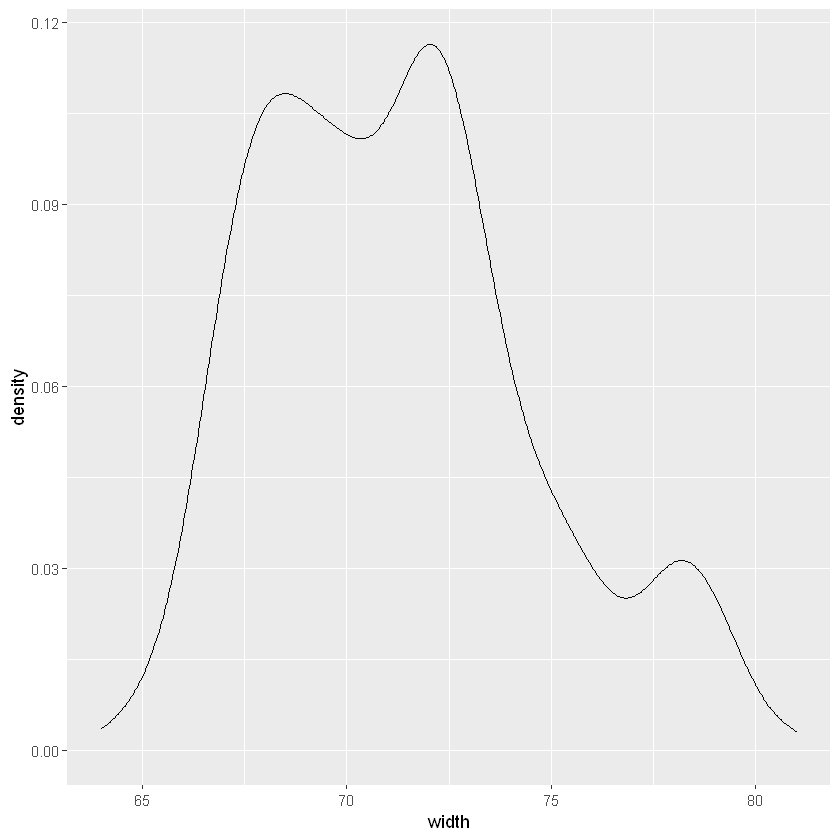

In [62]:
# Create plot of width
cars %>% 
  ggplot(aes(x=width)) +
  geom_density()

Because the `city_mpg` variable has a much wider range with its outliers, it's best to display its distribution as a box plot.

## Visualization in higher dimensions

> ### Plots for 3 variables

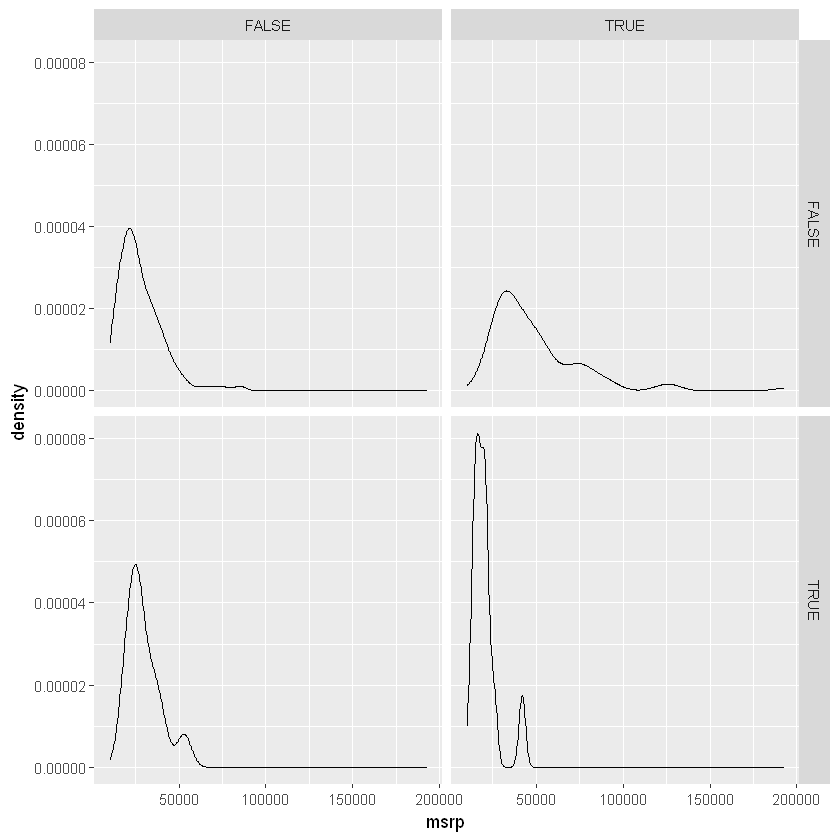

In [63]:
cars %>%
    ggplot(aes(x=msrp)) +
    geom_density() +
    facet_grid(pickup ~ rear_wheel)

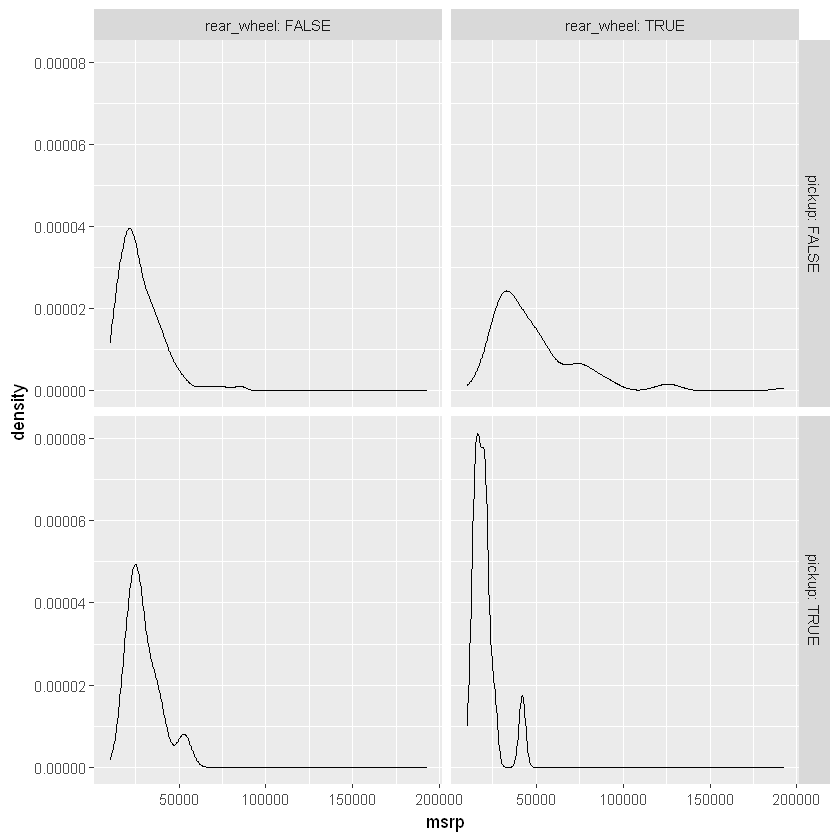

In [65]:
cars %>%
    ggplot(aes(x=msrp)) +
    geom_density() +
    facet_grid(pickup ~ rear_wheel, labeller = label_both)

In [66]:
table(cars$rear_wheel, cars$pickup)

       
        FALSE TRUE
  FALSE   306   12
  TRUE     98   12

> ### Higher dimensional plots
- Shape 
- Size 
- Color 
- Pattern 
- Movement 
- x-coordinate 
- y-coordinate

### 3 variable plot

Faceting is a valuable technique for looking at several conditional distributions at the same time. If the faceted distributions are laid out in a grid, we can consider the association between a variable and two others, one on the rows of the grid and the other on the columns.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."

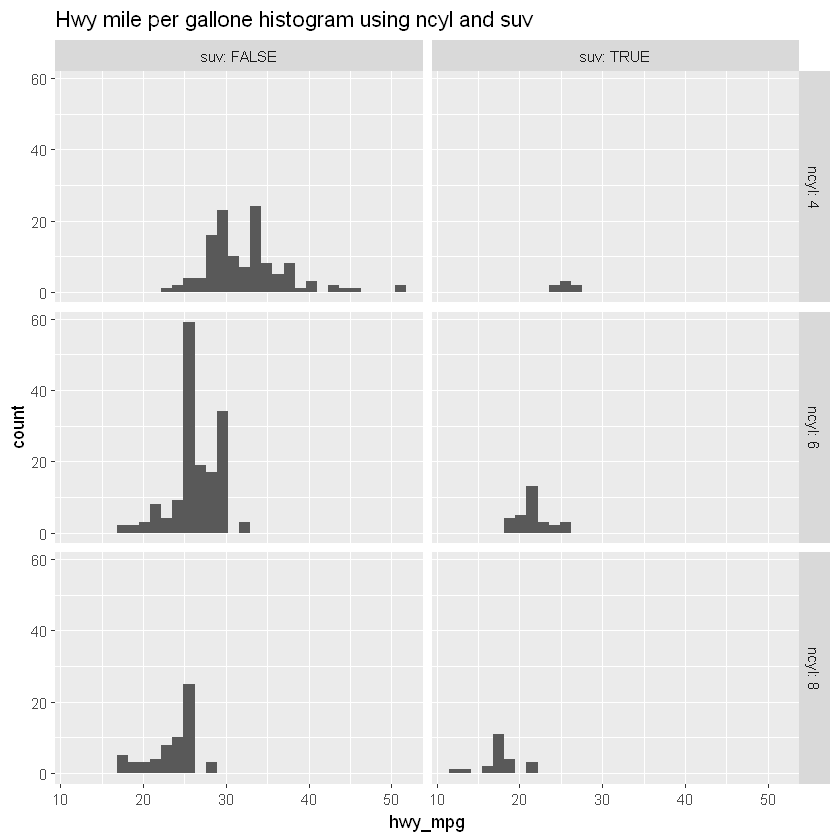

In [68]:
# Facet hists using hwy mileage and ncyl
common_cyl %>%
  ggplot(aes(x = hwy_mpg)) +
  geom_histogram() +
  facet_grid(ncyl ~ suv, labeller = label_both) +
  ggtitle("Hwy mile per gallone histogram using ncyl and suv")

Across both SUVs and non-SUVs, mileage tends to decrease as the number of cylinders increases.

# Numerical Summaries

Exploring some useful statistics for describing distributions of data.

In [69]:
life <- read_csv("datasets/life_exp_raw.csv")
head(life)

Parsed with column specification:
cols(
  State = col_character(),
  County = col_character(),
  fips = col_double(),
  Year = col_double(),
  `Female life expectancy (years)` = col_double(),
  `Female life expectancy (national, years)` = col_double(),
  `Female life expectancy (state, years)` = col_double(),
  `Male life expectancy (years)` = col_double(),
  `Male life expectancy (national, years)` = col_double(),
  `Male life expectancy (state, years)` = col_double()
)


State,County,fips,Year,Female life expectancy (years),"Female life expectancy (national, years)","Female life expectancy (state, years)",Male life expectancy (years),"Male life expectancy (national, years)","Male life expectancy (state, years)"
Alabama,Autauga County,1001,1985,77.0,77.8,76.9,68.1,70.8,69.1
Alabama,Baldwin County,1003,1985,78.8,77.8,76.9,71.1,70.8,69.1
Alabama,Barbour County,1005,1985,76.0,77.8,76.9,66.8,70.8,69.1
Alabama,Bibb County,1007,1985,76.6,77.8,76.9,67.3,70.8,69.1
Alabama,Blount County,1009,1985,78.9,77.8,76.9,70.6,70.8,69.1
Alabama,Bullock County,1011,1985,75.1,77.8,76.9,66.6,70.8,69.1


> ### Center: mean

In [81]:
rowMeans(head(life[,c(5:10)],1))

[1] 73.3

### Choice of center measure

The choice of measure for center can have a dramatic impact on what we consider to be a typical observation, so it is important that you consider the shape of the distribution before deciding on the measure.

In [86]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.8,8425333,779
Afghanistan,Asia,1957,30.3,9240934,821
Afghanistan,Asia,1962,32.0,10267083,853
Afghanistan,Asia,1967,34.0,11537966,836
Afghanistan,Asia,1972,36.1,13079460,740
Afghanistan,Asia,1977,38.4,14880372,786


In [88]:
gap2007 <- gapminder %>%
    filter(year==2007)
head(gap2007)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,2007,43.8,31889923,975
Albania,Europe,2007,76.4,3600523,5937
Algeria,Africa,2007,72.3,33333216,6223
Angola,Africa,2007,42.7,12420476,4797
Argentina,Americas,2007,75.3,40301927,12779
Australia,Oceania,2007,81.2,20434176,34435


### Calculate center measures

data from gapminder, which tracks demographic data in countries of the world over time. how the life expectancy differs from continent to continent.

In [89]:
# Compute groupwise mean and median lifeExp
gap2007 %>%
  group_by(continent) %>%
  summarize(mean(lifeExp),
            median(lifeExp))

`summarise()` ungrouping output (override with `.groups` argument)


continent,mean(lifeExp),median(lifeExp)
Africa,54.8,52.9
Americas,73.6,72.9
Asia,70.7,72.4
Europe,77.6,78.6
Oceania,80.7,80.7


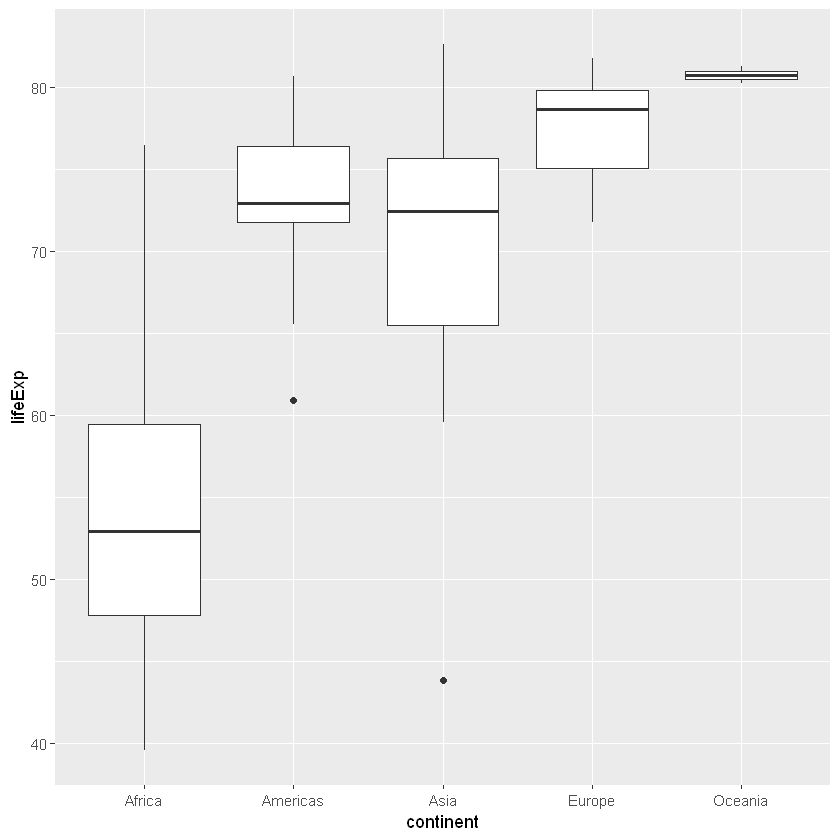

In [90]:
# Generate box plots of lifeExp for each continent
gap2007 %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

## Measures of variability


### Calculate spread measures

In [91]:
# Compute groupwise measures of spread
gap2007 %>%
  group_by(continent) %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

`summarise()` ungrouping output (override with `.groups` argument)


continent,sd(lifeExp),IQR(lifeExp),n()
Africa,9.631,11.610,52
Americas,4.441,4.632,25
Asia,7.964,10.152,33
Europe,2.980,4.782,30
Oceania,0.729,0.516,2


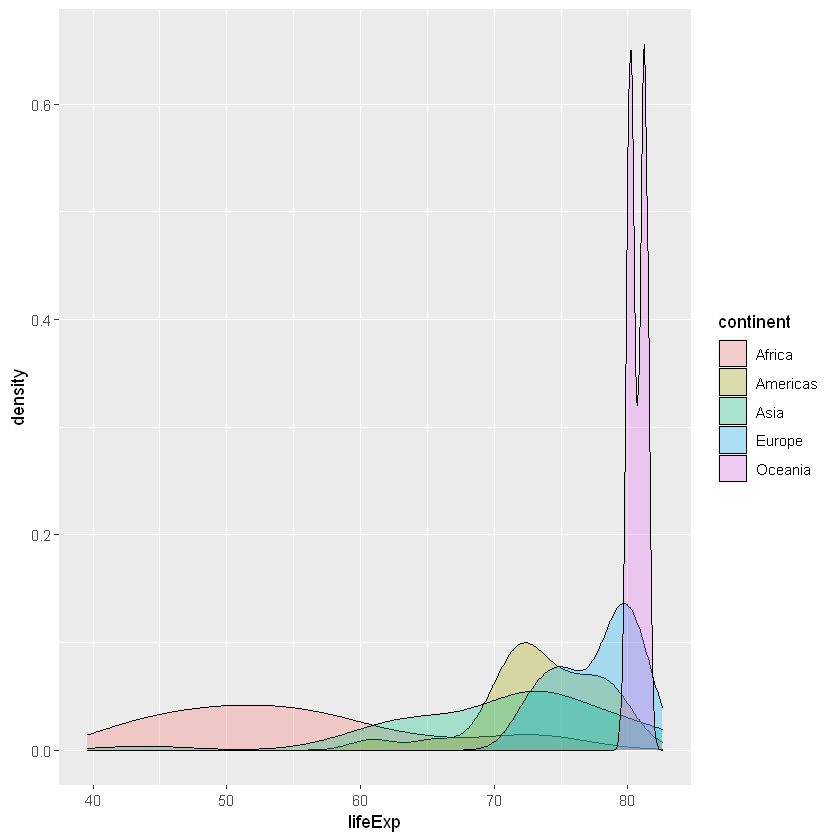

In [92]:
# Generate overlaid density plots
gap2007 %>%
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.3)

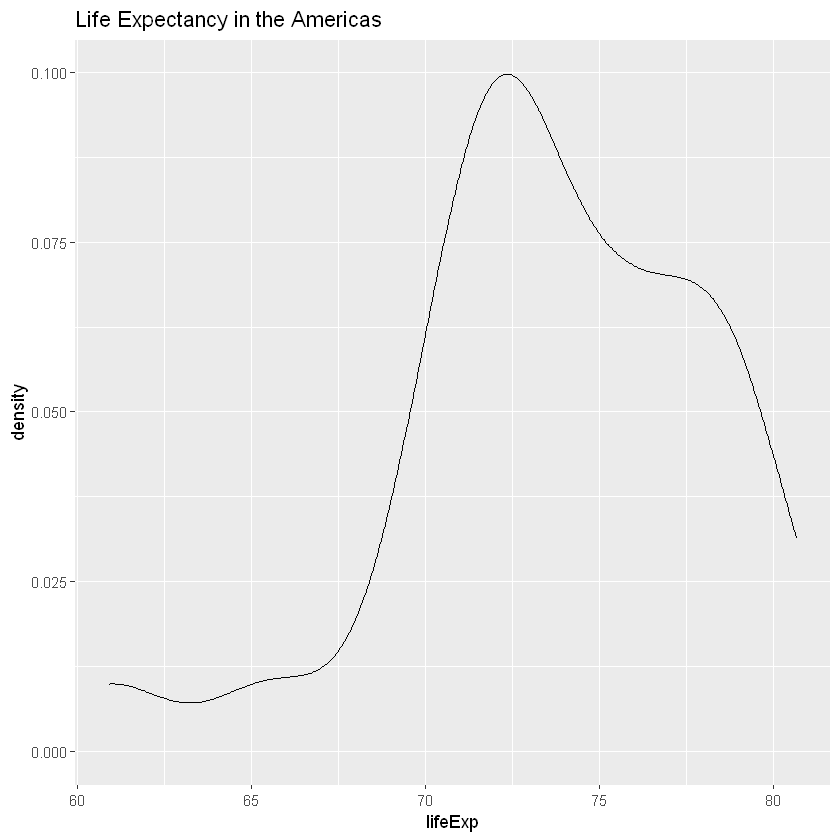

In [94]:
gap2007%>%
    filter(continent=="Americas") %>%
    ggplot(aes(x=lifeExp))+
    geom_density()+
    ggtitle("Life Expectancy in the Americas")

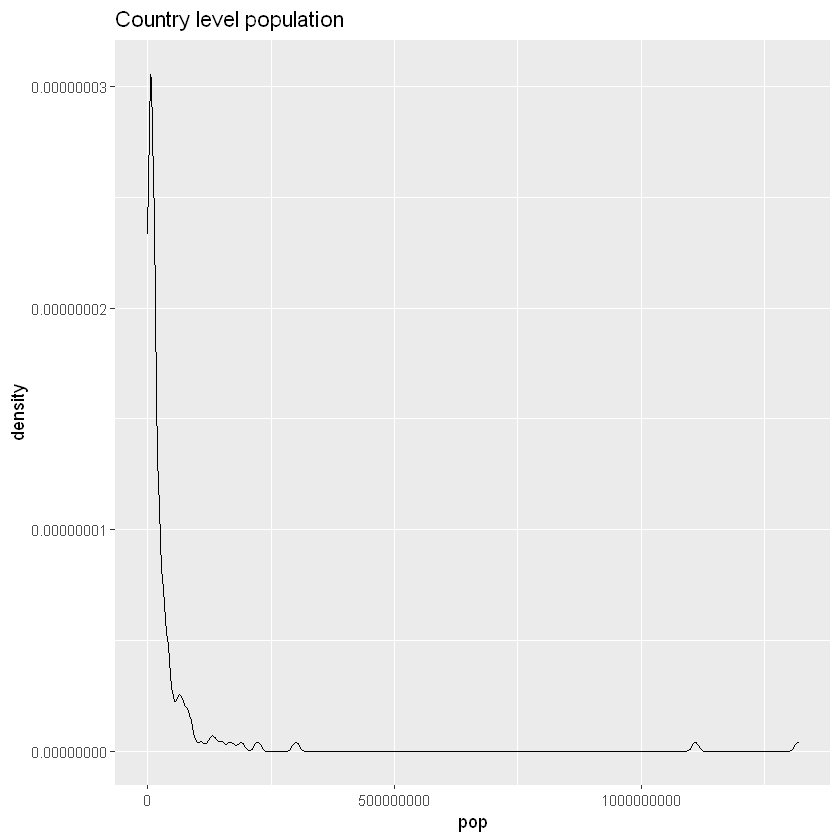

In [95]:
gap2007 %>%
    ggplot(aes(x=pop)) +
    geom_density() +
    ggtitle("Country level population")

In [96]:
# Compute stats for lifeExp in Americas
gap2007 %>%
  filter(continent=="Americas") %>%
  summarize(mean(lifeExp),
            sd(lifeExp))



mean(lifeExp),sd(lifeExp)
73.6,4.44


In [97]:
# Compute stats for population
gap2007 %>%
  summarize(median(pop),
            IQR(pop))

median(pop),IQR(pop)
10517531,26702008


Like mean and standard deviation, median and IQR measure the central tendency and spread, respectively, but are robust to outliers and non-normal data.

## Shape and transformations



### Transformations
Highly skewed distributions can make it very difficult to learn anything from a visualization. Transformations can be helpful in revealing the more subtle structure.

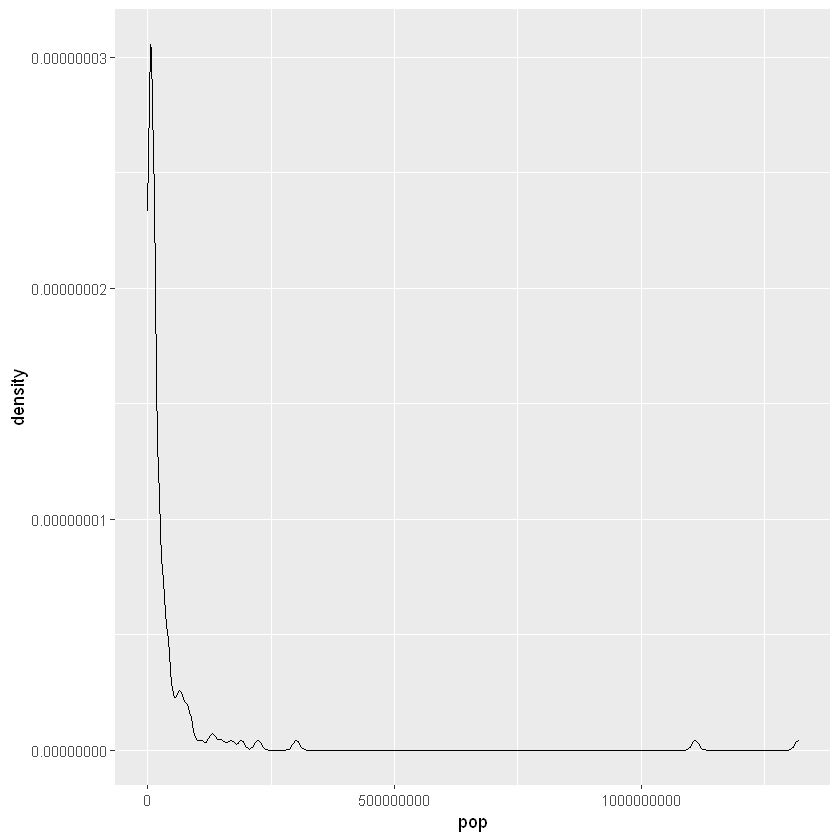

In [98]:
# Create density plot of old variable
gap2007 %>%
  ggplot(aes(x = pop)) +
  geom_density()



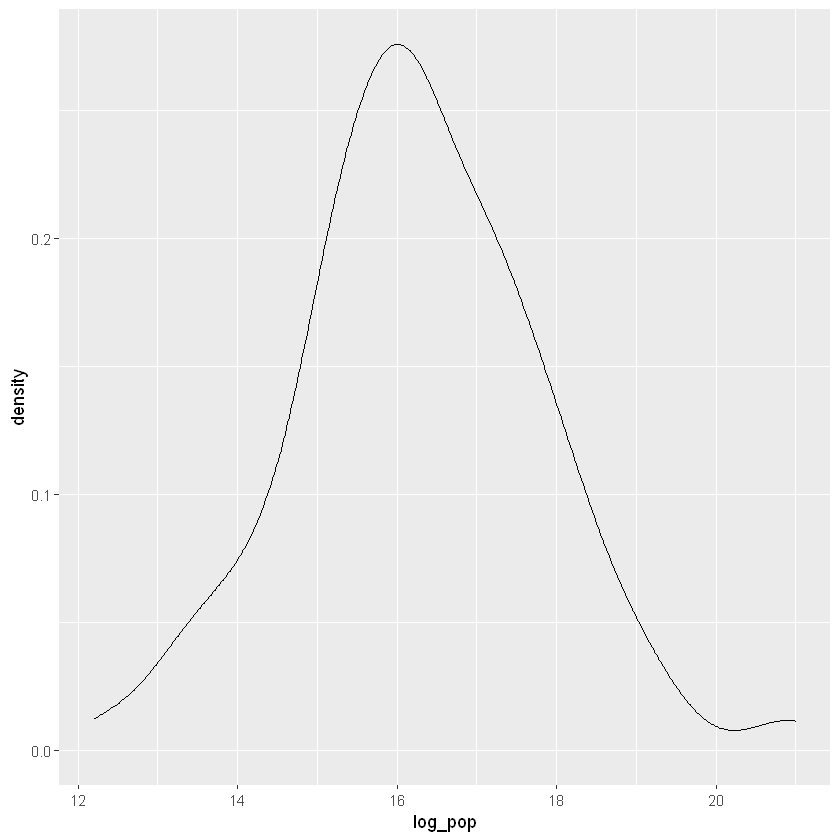

In [99]:
# Transform the skewed pop variable
gap2007 <- gap2007 %>%
  mutate(log_pop = log(pop))

# Create density plot of new variable
gap2007 %>%
  ggplot(aes(x =log_pop)) +
  geom_density()

## Outliers

### Identify outliers



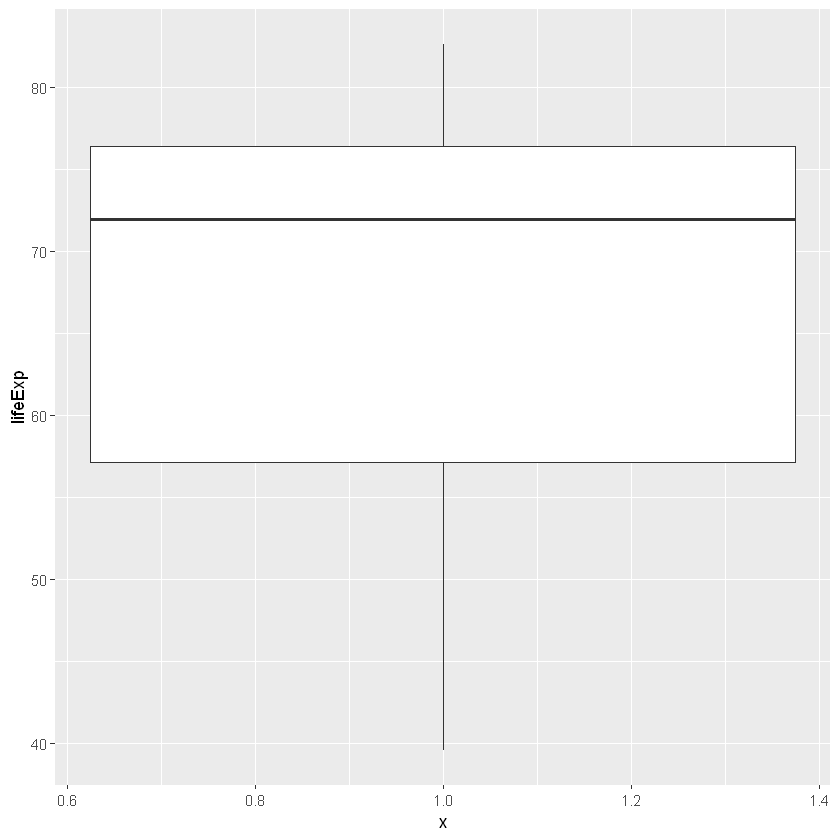

In [100]:
gap2007 %>%
    ggplot(aes(x=1, y=lifeExp)) +
    geom_boxplot()

The box plot identifies one clear outlier: a country with a notably low life expectancy. 

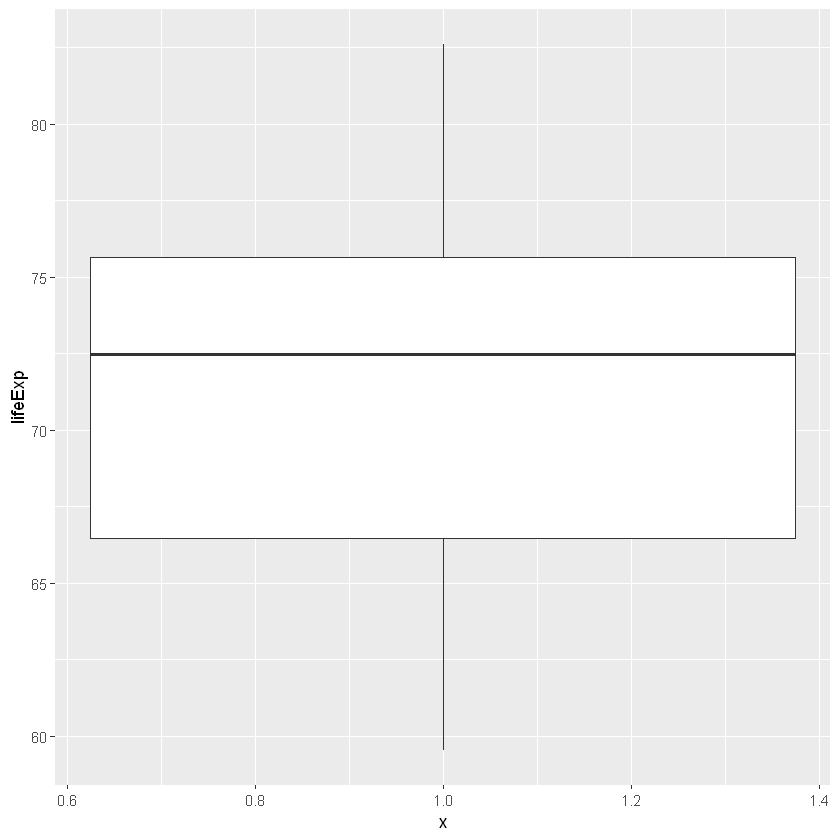

In [101]:
# Filter for Asia, add column indicating outliers
gap_asia <- gap2007 %>%
  filter(continent=="Asia") %>%
  mutate(is_outlier = lifeExp<50)

# Remove outliers, create box plot of lifeExp
gap_asia %>%
  filter(!is_outlier) %>%
  ggplot(aes(x = 1, y = lifeExp)) +
  geom_boxplot()

# Case Study

## Introducing the data

> ### Email data set

In [106]:
head(email)

spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,2012-01-01 09:16:41,0,0,0,no,...,0,0,11.37,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 10:03:59,0,0,0,no,...,0,0,10.50,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 19:00:32,0,0,4,no,...,0,0,7.77,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 12:09:49,0,0,0,no,...,0,0,13.26,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 13:00:01,0,0,0,no,...,0,2,1.23,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 13:04:46,0,0,0,no,...,0,2,1.09,25,0,0,0,0,1,none


In [107]:
glimpse(email)

Rows: 3,921
Columns: 21
$ spam         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ to_multiple  <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ from         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ cc           <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, ...
$ sent_email   <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...
$ time         <dttm> 2012-01-01 09:16:41, 2012-01-01 10:03:59, 2012-01-01 ...
$ image        <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ attach       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ dollar       <dbl> 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, ...
$ winner       <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no...
$ inherit      <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ viagra       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ password     <dbl> 0, 0, 0

> ### Histograms


### Spam and num_char

Is there an association between spam and the length of an email? We could imagine a story either way:

- _Spam is more likely to be a short message tempting me to click on a link, or_
- _My normal email is likely shorter since I exchange brief emails with my friends all the time._

In [109]:
# Compute summary statistics
email %>%
  group_by(spam) %>%
  summarize(IQR(num_char), median(num_char))

`summarise()` ungrouping output (override with `.groups` argument)


spam,IQR(num_char),median(num_char)
0,13.58,6.83
1,2.82,1.05


In [111]:
email <- email %>%
    mutate(spam=ifelse(spam, "spam", "not spam"))

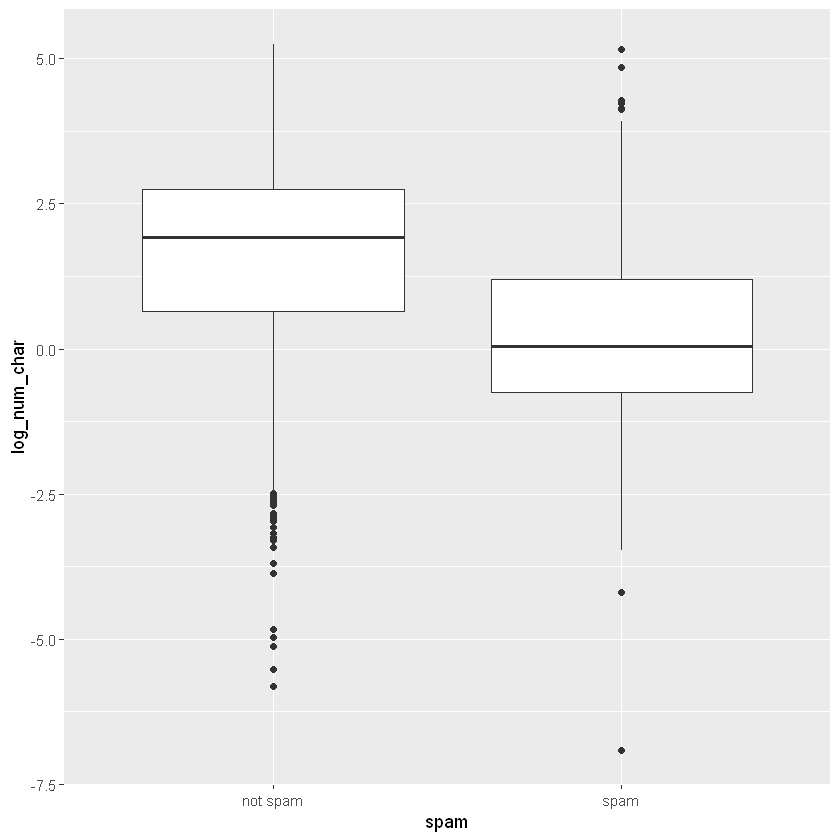

In [112]:
# Create plot
email %>%
    mutate(log_num_char = log(num_char)) %>%
        ggplot(aes(x = spam, y = log_num_char)) +
        geom_boxplot()

The median length of not-spam emails is greater than that of spam emails.


### Spam and !!!

Let's look at a more obvious indicator of spam: exclamation marks. `exclaim_mess` contains the number of exclamation marks in each message. Using summary statistics and visualization, let's see if there is a relationship between this variable and whether or not a message is spam.

In [113]:
# Compute center and spread for exclaim_mess by spam
email %>%
  group_by(spam) %>%
    summarize(median(exclaim_mess), IQR(exclaim_mess))





`summarise()` ungrouping output (override with `.groups` argument)


spam,median(exclaim_mess),IQR(exclaim_mess)
not spam,1,5
spam,0,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


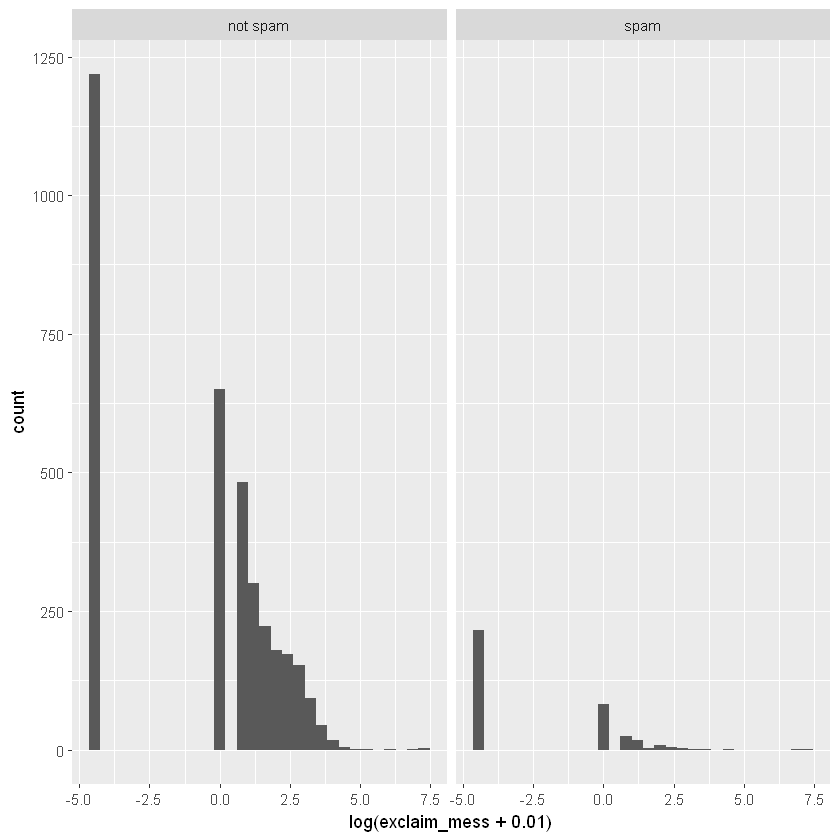

In [114]:
# Create plot for spam and exclaim_mess
email %>%
  ggplot(aes(x=log(exclaim_mess+.01))) +
  geom_histogram() +
  facet_wrap(~spam)


- The most common value of `exclaim_mess` in both classes of email is zero (a `log(exclaim_mess)` of -4.6 after adding .01).
- Even after a transformation, the distribution of `exclaim_mess` in both classes of email is right-skewed.
- The typical number of exclamations in the not-spam group appears to be slightly higher than in the spam group.

## Check-in 1

> ### Zero inflation strategies

- Analyze the two components separately 
- Collapse into two-level categorical variable

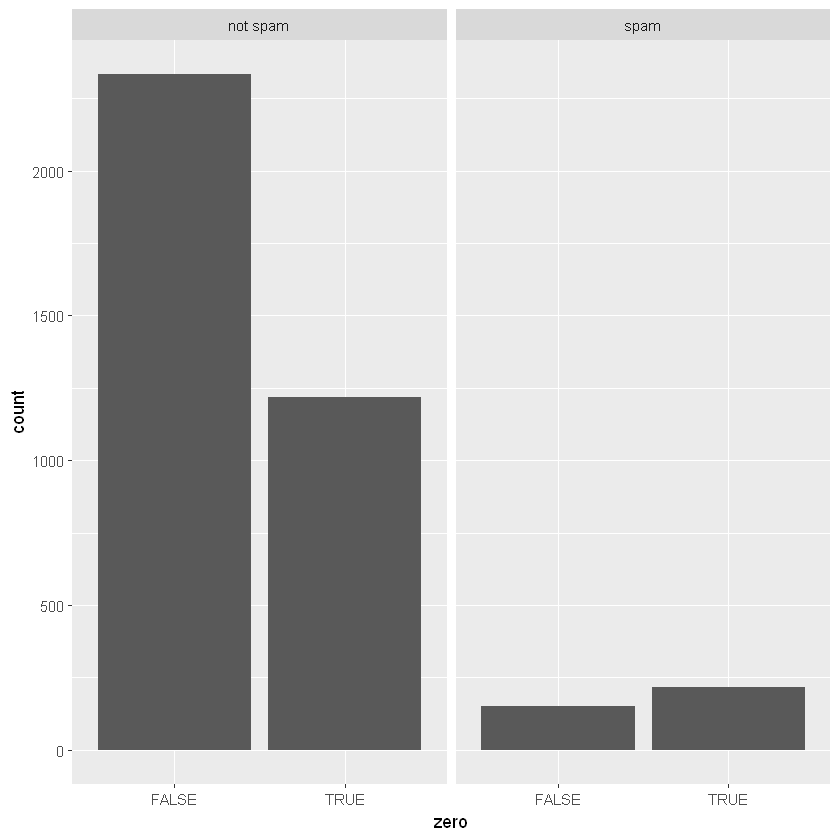

In [115]:
email %>%
    mutate(zero = exclaim_mess==0) %>%
        ggplot(aes(x=zero)) +
        geom_bar() +
        facet_wrap(~spam)

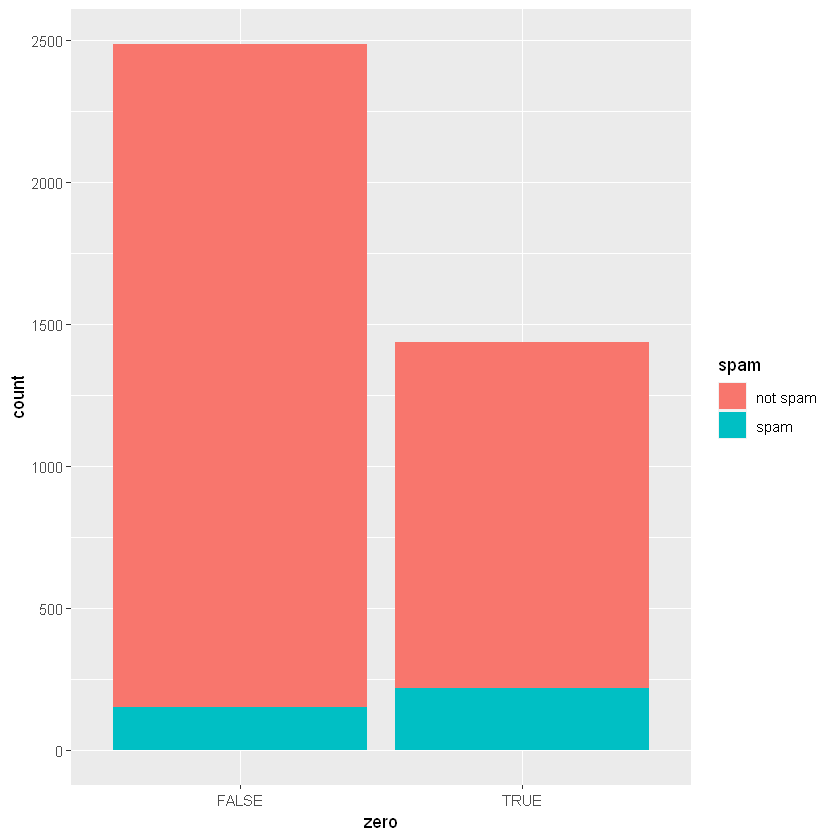

In [116]:
email %>%
    mutate(zero = exclaim_mess==0) %>%
        ggplot(aes(x=zero, fill=spam)) +
        geom_bar()

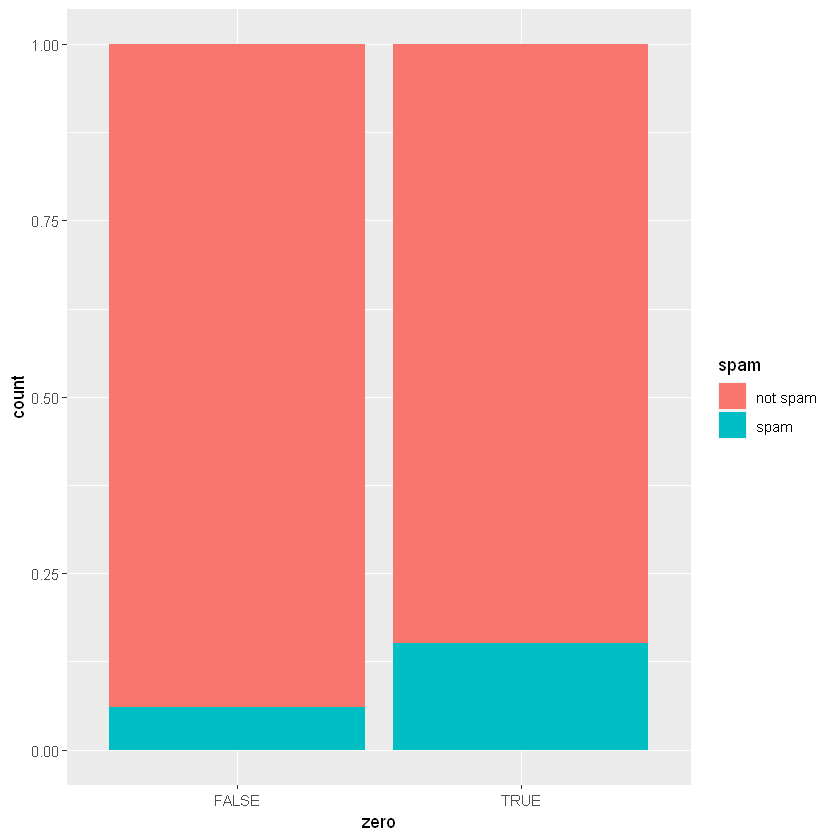

In [117]:
email %>%
    mutate(zero = exclaim_mess==0) %>%
        ggplot(aes(x=zero, fill=spam)) +
        geom_bar(position="fill")

### Collapsing levels

it was difficult to work with the heavy skew of `exclaim_mess`, the number of images attached to each email (image) poses even more of a challenge. 

In [118]:
table(email$image)


   0    1    2    3    4    5    9   20 
3811   76   17   11    2    2    1    1 

In [119]:
table(email$spam, email$image)

          
              0    1    2    3    4    5    9   20
  not spam 3446   74   17   11    2    2    1    1
  spam      365    2    0    0    0    0    0    0

Given the very low counts at the higher number of images, let's collapse image into a categorical variable that indicates whether or not the email had at least one image. 

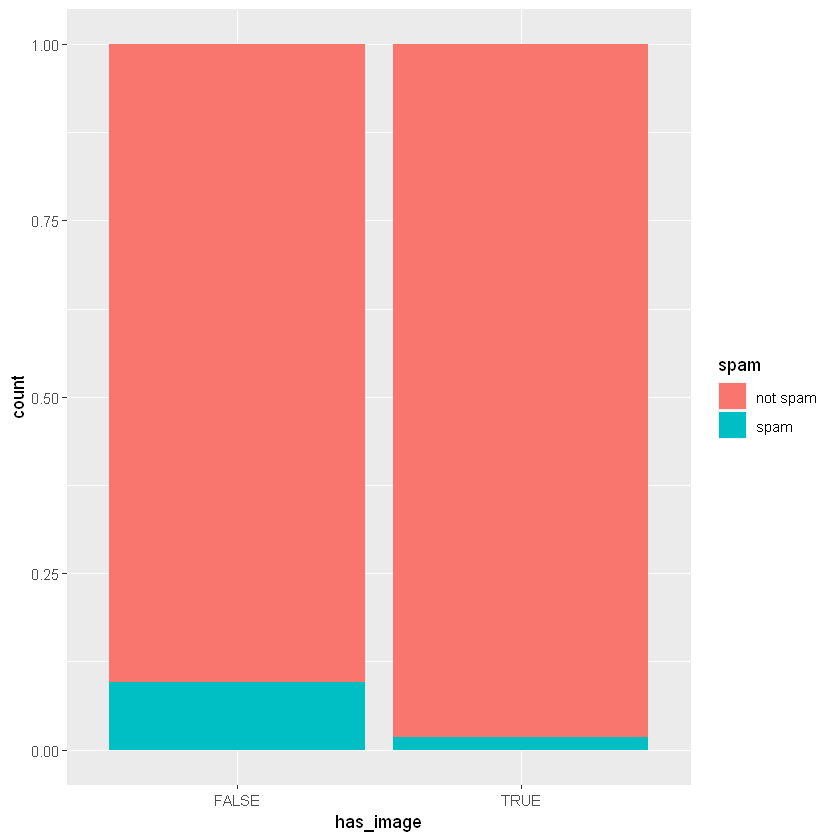

In [120]:
# Create plot of proportion of spam by image
email %>%
  mutate(has_image = image>0) %>%
  ggplot(aes(x = has_image, fill = spam)) +
  geom_bar(position = "fill")

An email without an image is more likely to be not-spam than spam

### Data Integrity

the variable `num_char` contains the number of characters in the email, in thousands, so it could take decimal values, but it certainly shouldn't take negative values.

In [121]:
sum(email$num_char<0)

[1] 0

#### do attached images count as attached files in this dataset?



In [122]:
head(email$attach)

[1] 0 0 0 0 0 0

In [123]:
# Test if images count as attachments
sum(email$image> email$image)

[1] 0

Since image is never greater than attach, we can infer that images are counted as attachments.

### Answering questions with chains

"Within non-spam emails, is the typical length of emails shorter for those that were sent to multiple people?"

In [126]:
email %>%
   filter(spam == "not spam") %>%
   group_by(to_multiple) %>%
   summarize(median(num_char))

`summarise()` ungrouping output (override with `.groups` argument)


to_multiple,median(num_char)
0,7.20
1,5.36


"yes": the typical length of non-spam sent to multiple people is a bit lower than those sent to only one person.

For emails containing the word "dollar", does the typical spam email contain a greater number of occurrences of the word than the typical non-spam email?

In [127]:
# Question 1
email %>%
  filter(dollar>0) %>%
  group_by(spam) %>%
  summarize(median(dollar))



`summarise()` ungrouping output (override with `.groups` argument)


spam,median(dollar)
not spam,4
spam,2


If you encounter an email with greater than 10 occurrences of the word "dollar", is it more likely to be spam or not-spam? 

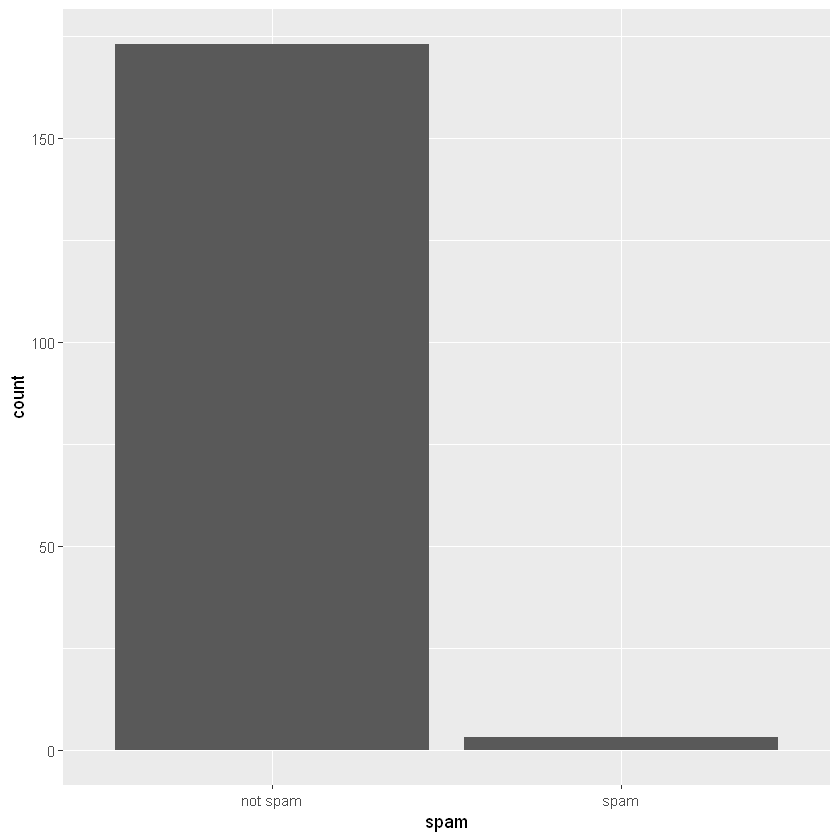

In [129]:
# Question 2
email %>%
  filter(dollar>10) %>%
  ggplot(aes(x = spam)) +
  geom_bar()

## Check-in 2


> ### Spam and images 

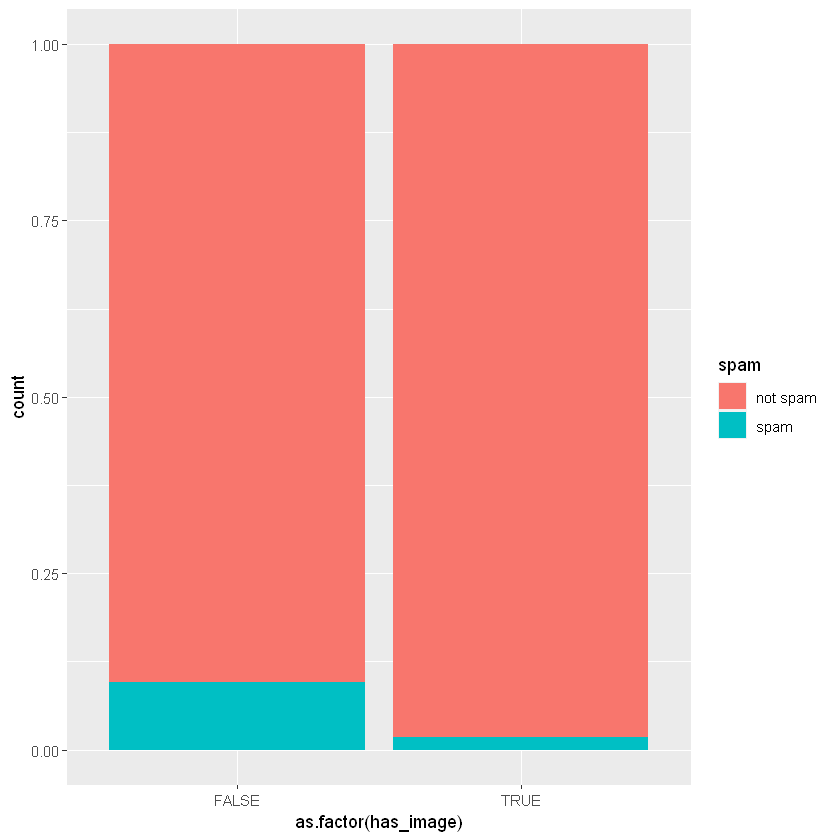

In [130]:
email %>%     
    mutate(has_image = image > 0) %>%    
        ggplot(aes(x = as.factor(has_image), fill = spam)) +     
        geom_bar(position = "fill")


> ### Spam and images 

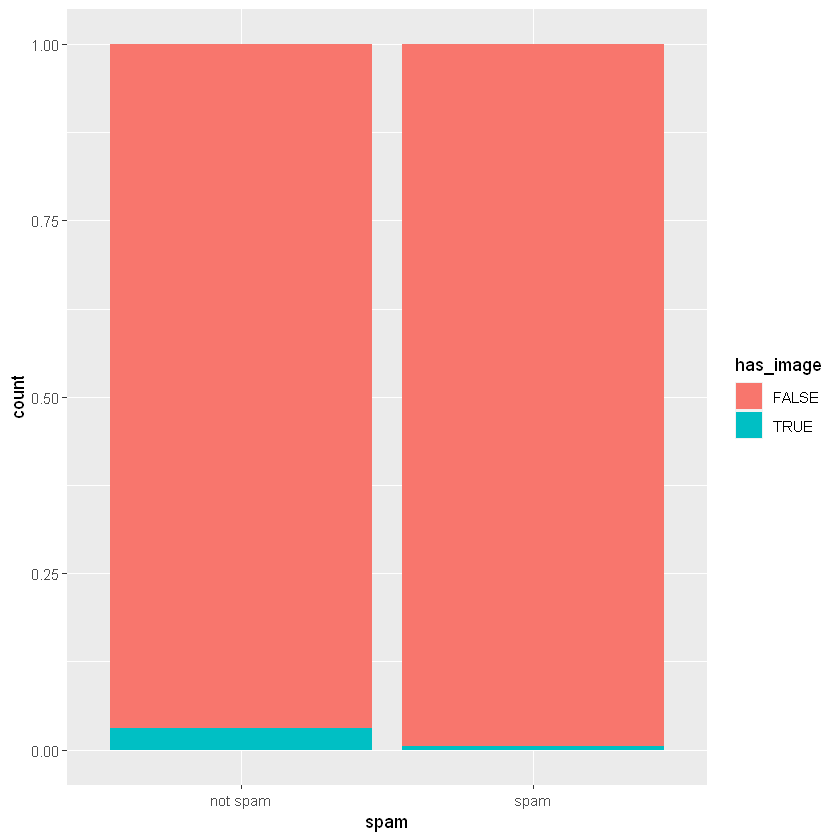

In [131]:
email %>%     
    mutate(has_image = image > 0) %>%    
        ggplot(aes(x = spam, fill = has_image)) +     
        geom_bar(position = "fill")


> ### Ordering bars 

In [132]:
email <- email %>%     
    mutate(zero = exclaim_mess == 0) 
levels(email$zero) 

NULL

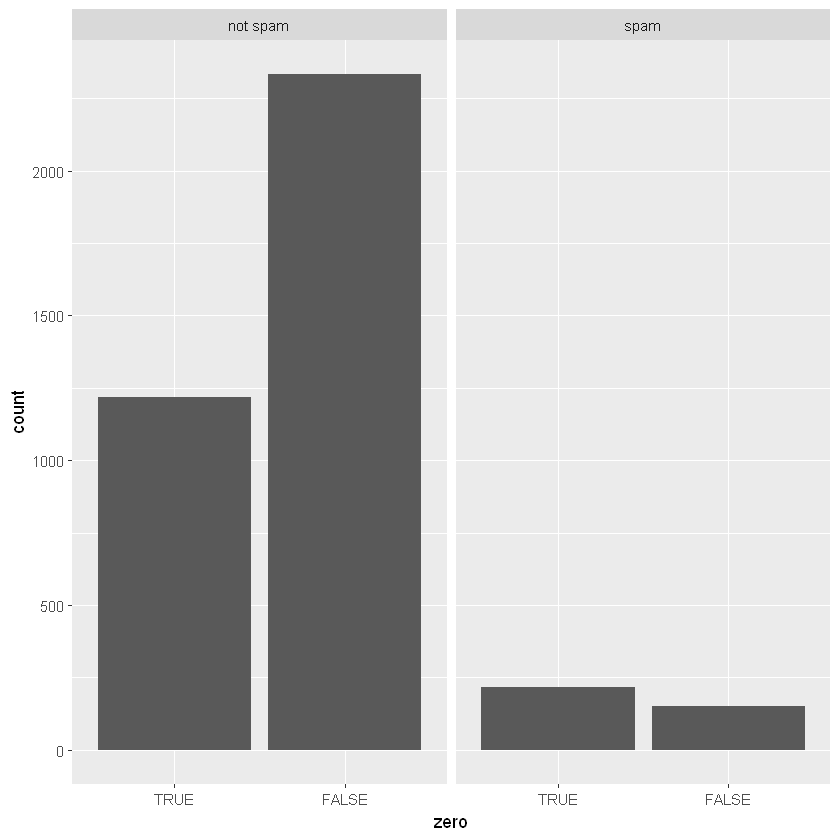

In [133]:
email$zero <- factor(email$zero, levels = c("TRUE", "FALSE"))

email %>%    
    ggplot(aes(x = zero)) +    
    geom_bar() +    
    facet_wrap(~spam)

### What's in a number?

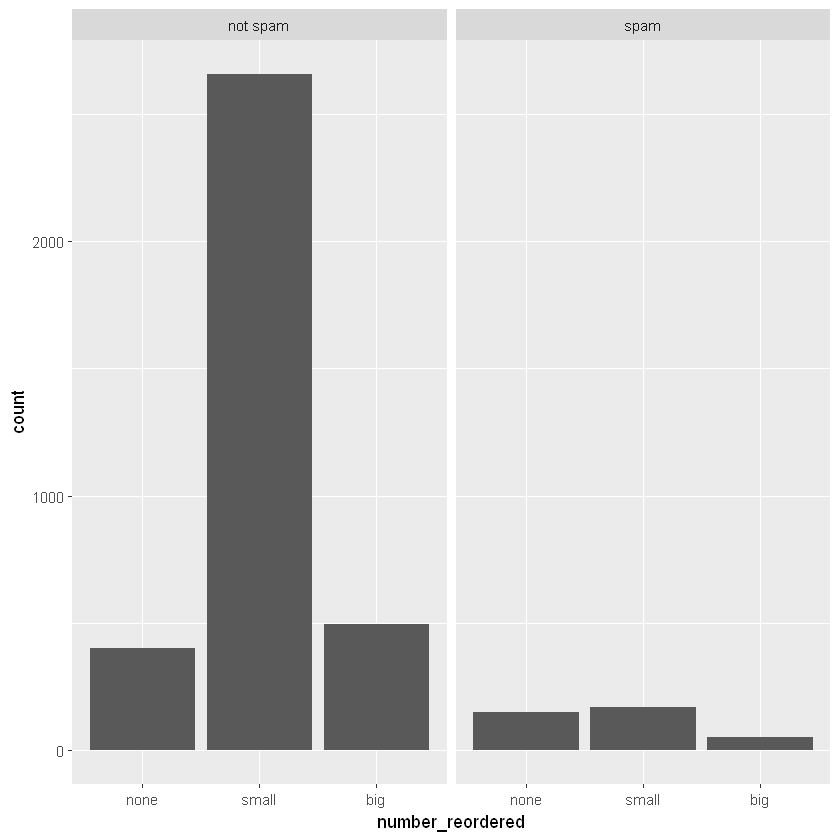

In [134]:
# Reorder levels
email$number_reordered <- factor(email$number, levels=c("none", "small", "big"))

# Construct plot of number_reordered
ggplot(email, aes(x=number_reordered))+
  geom_bar() +
  facet_wrap(~spam)

- Given that an email contains a small number, it is more likely to be not-spam.
- Given that an email contains a big number, it is more likely to be not-spam.
- Within both spam and not-spam, the most common number is a small one.